# MSDS 458: Research/Programming Assignment #4 (Final Assignment): Part 6

**Management Problem**

For this final research assignment, I apply deep learning methods that we covered in the course (MSDS 458) to conduct sentiment analysis of Twitter data, a challenging yet important field of study for organizations in both public and private sectors. Twitter is a popular platform where entities at all levels—governments, businesses, country leaders, celebrities, and even the average social media user—express their opinions. The content of such tweets could represent a country's official policy or collectively, a country's public sentiment toward a particular issue. Given the massive volume of tweets generated each day—on average, [6,000 tweets are posted on Twitter every second](https://www.internetlivestats.com/twitter-statistics/) —there is immense value in being able quickly and accurately determine such sentiment values (e.g., positive or negative). I combine natural language processing (NLP) and deep learning techniques to build a robust Twitter sentiment classification model. 

**Corpus Description**

The corpus I use is Stanford University's [Sentiment140](http://cs.stanford.edu/people/alecmgo/trainingandtestdata.zip). The dataset is a CSV file consisting of 1.6 million English-language tweets. The tweets are annotated using six attributes: 1. polarity of the tweet (0 = negative, 2 = neutral, 4 = positive); 2. ID; 3. date; 4. query; 5. username; 6. text.  For this project, I plan to use the polarity and text content to build a model that could take any given tweet and determine the most probable sentiment value.

**Methods**

***Text Preprocessing & Data Exploration***
<p>Given the massive number of documents in the corpus (one tweet = one document), it is important to ensure the data, particularly each tweet's text, is cleaned and tokenized properly for any follow-on modeling tasks. Regular expressions are useful in handling any emoticons or special characters (e.g., @ symbols and hashtags). As part of the data exploration step, I also generate visualizations using histograms and word clouds representing various aspects of the tweets (e.g., text content, null values, positive/negative/neutral breakdown, etc.) to gain a broad understanding of both qualitative and quantitative aspects of the corpus.</p>

***Text Vectorization***
<p>While the focus of this project is evaluating optimal deep neural network (DNN) architectures and parameters for Twitter sentiment analysis, such work is dependent on proper experimentation and implementation of various text vectorization methods. I leverage the techniques I learned in MSDS 453 for this task, which include applying word embedding approaches such as TF-IDF and Doc2vec. Since there are 1.6 million documents, it is important for me to limit the vocabulary by tuning the vectorizer hyperparameters (e.g., max_features, max_df) and exploring dimensionality reduction techniques, such as PCA.</p>
<p>I evaluate the vectors using various classifiers to ensure I have the optimal number of features in training for the classification models. I experiment with both traditional classifiers (e.g., logistic regression, random forest, and ensemble methods) and neural networks.</p>

***Building Neural Network-Based Models***
<p>The main part of this research assignment entails careful experimentation of various DNNs we covered in MSDS 458, including fully-connected dense networks, recurrent neural networks (RNN), long short-term memory networks (LSTM), and convolutional neural networks (CNN). The neural networks are built using Keras. The evaluation method to determine the best classification model consists of a strict training-and-test regimen using a crossed experimental design (e.g., maintain consistent hyperparameter settings for consistency). Vocabulary size and word embeddings also remain consistent. I experiment with various network structure designs, hyperparameter settings, and model fit methods by taking the input data (i.e., processed tweet text vectors) through single to multiple layers consisting of varying nodes/units across dense networks, RNNs, LSTM networks, and CNNs.</p>

**Evaluation**
<p>I track and compare training/testing times as well as accuracy and loss curves for train, validation, and test datasets to evaluate the deep learning models' performances. I also provide charts and plots summarizing these key metrics to visually capture which neural network structures and models yield the strongest performance, in terms of implementation time and accuracy.</p>

## NOTES

This notebook is a continuation (part 4 of 6) of MSDS 458 Final Assignment. You need access to the clean_tweets.csv file in order to run the following code.

In parts 3-6, I use observations and findings from parts 1 and 2 to train various neural network models:

* EXPERIMENT 1: Fully connected dense neural network (DNN)
* EXPERIMENT 2: Simple RNN
* EXPERIMENT 3: LSTM RNN
* **EXPERIMENT 4: 1D CNN**

The objective is to see if I can train a neural network model that could perform better than traditional machine learning models, namely logistic regrssion using a trigram TF-IDF vectorization.

This notebook covers **Experiment 4: 1D CNN**

## Import packages needed (and set seed)

Since Keras in part of TensorFlow 2.x, we import keras from tensorflow and use tenserflow.keras.xxx to import all other Keras packages. The seed argument produces a deterministic sequence of tensors across multiple calls.

In [0]:
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import models
# from tensorflow.keras.models import Sequential, load_model
# from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Embedding
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout
# from tensorflow.keras.callbacks import ModelCheckpoint
# from tensorflow.keras.preprocessing import sequence
# keras.__version__

In [0]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import re
import os

from google.colab import files
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import utils
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction import text
from time import time

from pprint import pprint
# plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
seed = 50
np.random.seed(seed)
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential, load_model
from keras.layers import Flatten, Dense, Dropout, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D
from keras.callbacks import ModelCheckpoint
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout
from keras.layers import Activation, Dropout, Flatten, Dense

Using TensorFlow backend.


In [0]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [6]:
import os
os.chdir('/content/drive/My Drive/MSDS Files/MSDS 458/Assignment 4')

# Check working directory
!pwd

# Check files in directory
!ls

/content/drive/My Drive/MSDS Files/MSDS 458/Assignment 4
 clean_tweets.csv
 clf_compare_accuracy_summary.csv
 clf_compare_accuracy_summary_v2.csv
 cvec_tfidf_accuracy_summary.csv
 d2v_model_dbow.doc2vec
 d2v_model_dbow.doc2vec.docvecs.vectors_docs.npy
 d2v_model_dbow.doc2vec.trainables.syn1neg.npy
 d2v_model_dbow.doc2vec.wv.vectors.npy
 Data
 dbow_cvec_tfidf_accuracy_summary.csv
 dbow_cvec_tfidf_accuracy_summary.gsheet
 dmm_dbow_cvec_tfidf_accuracy_summary.csv
 glove.twitter.27B
 model_cnn1a.h5
 model_cnn1b.h5
 model_cnn1c.h5
 model_cnn1.h5
 model_cnn2.h5
 model_cnn3.h5
 model_cnn4.h5
 model_dnn1.h5
 model_dnn2.h5
 model_dnn3.h5
 model_lstm1.h5
 model_lstm2.h5
 model_lstm3.h5
 model.png
 model_rnn1.h5
 model_rnn2.h5
 model_rnn3.h5
'MSDS 458 Assignment 4: NN Models Performance Summary.gsheet'
 ngram_accuracy_comparison_plot.png
 results1.pkl
 results2.pkl
 results2_v2.pkl
 results2_v3.pkl
 results3.csv
 results3.pkl
 results4.csv
 results4.pkl
 results5.csv
 results5.pkl
 tfidf_lr_final

In [7]:
df = pd.read_csv('clean_tweets.csv', index_col=0)

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [8]:
df.head()

,text,target
0,awww that bummer you shoulda got david carr of...,0
1,is upset that he can not update his facebook b...,0
2,dived many times for the ball managed to save ...,0
3,my whole body feels itchy and like its on fire,0
4,no it not behaving at all mad why am here beca...,0


## Model Training Prep

Train / Dev / Test Split

Given the 1.5 million+ size of the dataset, I will split the data into training, validation, and test data.

In [0]:
x = df.text
y = df.target

In [0]:
SEED = 5000
x_train, x_validation_and_test, y_train, y_validation_and_test = train_test_split(x, y, test_size=.02, random_state=SEED)
x_validation, x_test, y_validation, y_test = train_test_split(x_validation_and_test, y_validation_and_test, test_size=.5, random_state=SEED)

In [11]:
print("Train set has total {0} entries with {1:.2f}% negative tweets, {2:.2f}% positive tweets.".format(len(x_train),
                                                                             (len(x_train[y_train == 0]) / (len(x_train)*1.))*100,
                                                                            (len(x_train[y_train == 1]) / (len(x_train)*1.))*100))
print("Validation set has total {0} entries with {1:.2f}% negative tweets, {2:.2f}% positive tweets.".format(len(x_validation),
                                                                             (len(x_validation[y_validation == 0]) / (len(x_validation)*1.))*100,
                                                                            (len(x_validation[y_validation == 1]) / (len(x_validation)*1.))*100))
print("Test set has total {0} entries with {1:.2f}% negative tweets, {2:.2f}% positive tweets.".format(len(x_test),
                                                                             (len(x_test[y_test == 0]) / (len(x_test)*1.))*100,
                                                                            (len(x_test[y_test == 1]) / (len(x_test)*1.))*100))

Train set has total 1564120 entries with 50.02% negative tweets, 49.98% positive tweets.
Validation set has total 15960 entries with 49.18% negative tweets, 50.82% positive tweets.
Test set has total 15961 entries with 49.86% negative tweets, 50.14% positive tweets.


## Train/Test Timer Functions

In [0]:
# Define callback to get total training time
import datetime

class TrainRuntimeCallback(keras.callbacks.Callback):

  def on_train_begin(self,logs={}):
    self.start = datetime.datetime.now()

  def on_train_end(self,logs={}):
    self.process_time = (datetime.datetime.now() - self.start).total_seconds()


# Define callback to get total test time

class TestRuntimeCallback(keras.callbacks.Callback):

  def on_test_begin(self,logs={}):
    self.start = datetime.datetime.now()

  def on_test_end(self,logs={}):
    self.process_time = (datetime.datetime.now() - self.start).total_seconds()

train_rt = TrainRuntimeCallback()
test_rt = TestRuntimeCallback()

## Hyperparameter Settings

In [0]:
num_epochs = 10
batch_size = 256  # increased batch size from 64 to 256 after seeing noticeable improvement in performance
# validation_split = 0.20
patience = 3
# cbs = [train_rt, keras.callbacks.EarlyStopping(patience=5, restore_best_weights = True)]

optimizer='rmsprop'
loss='binary_crossentropy'
metrics=['accuracy']

dropout = 0.2
pool_size = 3

## TF-IDF + Logistic Regression (Trigram) - **NOT REQUIRED FOR THIS NOTEBOOK**

In part 2, I discovered that a logistic regression model with a trigram TF-IDF vectorization resulted in the highest accuracy (higher than the Doc2vec+DBOW model or Doc2vec+DMM models). I will generate the accuracy scores for both the train and validation data as reference points for the subsequent neural network model.

In [44]:
tfidf_vector = TfidfVectorizer(max_features=80000,ngram_range=(1, 3))
tfidf_vector.fit(x_train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=80000,
                min_df=1, ngram_range=(1, 3), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [0]:
#vectorizing train data
x_train_tfidf = tfidf_vector.transform(x_train)

In [0]:
#vectorizing validation data
x_validation_tfidf = tfidf_vector.transform(x_validation).toarray()

In [0]:
# vectorizing test data
x_test_tfidf = tfidf_vector.transform(x_test).toarray()

In [0]:
# %%time
# lr_clf = LogisticRegression()
# lr_clf.fit(x_train_tfidf, y_train)

In [0]:
# lr_clf.score(x_validation_tfidf, y_validation)

In [0]:
# lr_clf.score(x_train_tfidf, y_train)

In [0]:
# lr_clf.score(x_test_tfidf, y_test)

**TF-IDF + Logistic Regression Accuracy Results:**
*  Training Accuracy: 83.60%
*  Validation Accuracy: 83.20%
*  Test Accuracy: 81.93%

## Text Preprocessing w/ Pre-Trained Word Embeddings

In [0]:
# import gensim.downloader as api
# glove_twitter = api.load("glove-twitter-200")

In [0]:
# len(glove_twitter.vocab.keys())

In [0]:
# embeddings_index = {}
# for w in glove_twitter.vocab.keys():
#     embeddings_index[w] = glove_twitter[w]
# print('Found %s word vectors.' % len(embeddings_index))

In [19]:
glove_dir = '/content/drive/My Drive/MSDS Files/MSDS 458/Assignment 4/glove.twitter.27B'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.twitter.27B.200d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 1193515 word vectors.


In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [0]:
tokenizer = Tokenizer(num_words=100000)
tokenizer.fit_on_texts(x_train)
sequences = tokenizer.texts_to_sequences(x_train)

In [22]:
len(tokenizer.word_index)

261744

In [23]:
for x in x_train[:5]:
    print(x)

run house but shit its taking me away from my homework ahhhh more classes more assignments
and we are having jaljeera party join in buddy fb
going out with friends tonight today is friends day
went paintballing yesterday got shot in the arm and it hurts but shot kid and he was cying in pain so its no all bad haha evil me
sorry ll make you chicken soup


In [24]:
sequences[:5]

[[436, 204, 17, 353, 62, 408, 14, 212, 51, 3, 578, 1517, 79, 1138, 79, 2826],
 [5, 43, 33, 171, 14239, 269, 781, 9, 1232, 647],
 [42, 31, 20, 185, 116, 37, 8, 185, 29],
 [203,
  15929,
  278,
  45,
  1106,
  9,
  2,
  1486,
  5,
  4,
  340,
  17,
  1106,
  858,
  5,
  78,
  23,
  51053,
  9,
  494,
  15,
  62,
  35,
  30,
  110,
  97,
  1549,
  14],
 [115, 73, 119, 6, 870, 1449]]

In [0]:
length = []
for x in x_train:
    length.append(len(x.split()))

In [26]:
max(length)

40

In [27]:
# pad sequence train data
x_train_seq = pad_sequences(sequences, maxlen=45)
print('Shape of data tensor:', x_train_seq.shape)

Shape of data tensor: (1564120, 45)


In [28]:
x_train_seq[:5]

array([[    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,   436,   204,    17,   353,    62,   408,    14,
          212,    51,     3,   578,  1517,    79,  1138,    79,  2826],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     5,
           43,    33,   171, 14239,   269,   781,     9,  1232,   647],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
    

In [0]:
# pad sequence val data
sequences_val = tokenizer.texts_to_sequences(x_validation)
x_val_seq = pad_sequences(sequences_val, maxlen=45)

In [0]:
# pad sequence test data
sequences_test = tokenizer.texts_to_sequences(x_test)
x_test_seq = pad_sequences(sequences_test, maxlen=45)

I am defining the number of words to be 100,000. This means I will only care about 100,000 most frequent words in the training set. If I don't limit the number of words, the total number of vocabulary will be more than 200,000.

In [0]:
num_words = 100000
embedding_matrix = np.zeros((num_words, 200))
for word, i in tokenizer.word_index.items():
    if i >= num_words:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

As a sanity check, if the embedding matrix has been generated properly. Above, when I saw the first five entries of the training set, the first entry started with the word "run," which had the sequential representation [436]. Let's see if the 436th embedding matrix is as same as vectors for the word 'run.'

In [32]:
np.array_equal(embedding_matrix[436] ,embeddings_index.get('run'))

True

## Training Models

### 1D CNN (Using Pre-Trained Word Embeddings)

Pretrained word embeddings are the GloVe Twitter 200-dimension word vectors (2B tweets, 27B tokens, 1.2M vocab, uncased, 200d vectors, 1.42 GB download): glove.twitter.27B.zip

Available here: https://github.com/stanfordnlp/GloVe

#### Build Network

##### Network #1

The sigmoid activation function is used at the output layer is because the classification task involves only two classes (either positive or negative).

In [0]:
model_cnn1 = Sequential()
e = Embedding(100000, 200, weights=[embedding_matrix], input_length=45, trainable=False)
model_cnn1.add(e)
model_cnn1.add(BatchNormalization())
model_cnn1.add(Conv1D(filters = 128, kernel_size = 3, activation='relu'))
model_cnn1.add(MaxPooling1D(pool_size=pool_size))
model_cnn1.add(Conv1D(filters = 128, kernel_size = 3, activation='relu'))
model_cnn1.add(MaxPooling1D(pool_size=pool_size))
model_cnn1.add(Flatten())
model_cnn1.add(Dense(units = 128, activation='relu'))
model_cnn1.add(Dense(units = 1, activation='sigmoid'))

model_cnn1.compile(optimizer=optimizer,
              loss=loss,
              metrics=metrics)

# define the checkpoint
filepath = "model_cnn1.h5"
cnn1_checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period = 1)

model_cnn1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 45, 200)           20000000  
_________________________________________________________________
batch_normalization_1 (Batch (None, 45, 200)           800       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 43, 128)           76928     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 14, 128)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 12, 128)           49280     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 4, 128)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)              

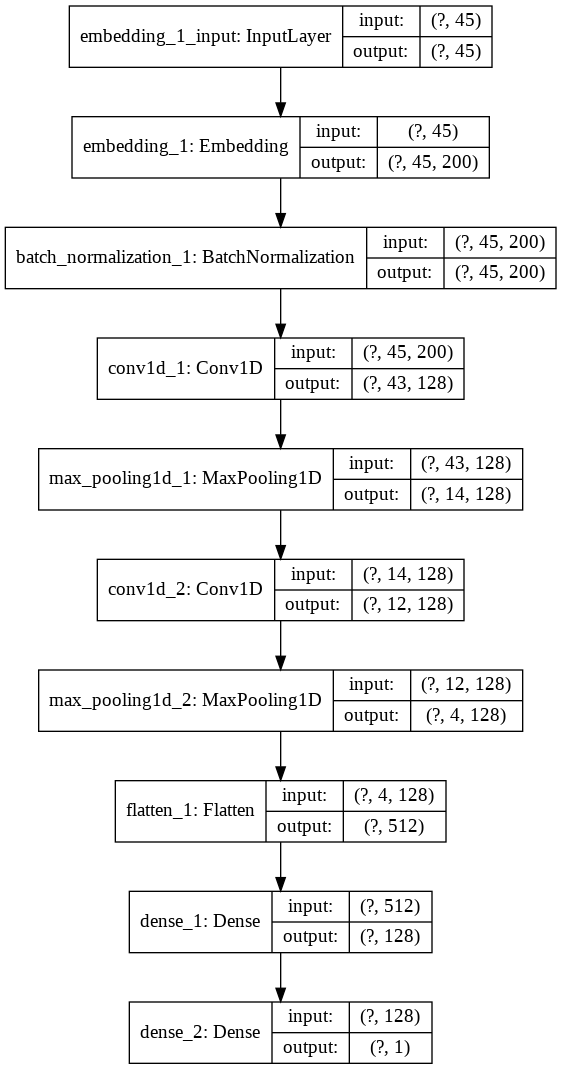

In [0]:
keras.utils.plot_model(model_cnn1, show_shapes=True)

##### Network #2
*  Increase filters to 256 for each Conv layer

In [0]:
model_cnn1a = Sequential()
e = Embedding(100000, 200, weights=[embedding_matrix], input_length=45, trainable=False)
model_cnn1a.add(e)
model_cnn1a.add(BatchNormalization())
model_cnn1a.add(Conv1D(filters = 256, kernel_size = 3, padding='valid', activation='relu', strides=1))
model_cnn1a.add(MaxPooling1D(pool_size=pool_size))
model_cnn1a.add(Conv1D(filters = 256, kernel_size = 3, padding='valid', activation='relu', strides=1))
model_cnn1a.add(MaxPooling1D(pool_size=pool_size))
model_cnn1a.add(Flatten())
model_cnn1a.add(Dense(units = 256, activation='relu'))
model_cnn1a.add(Dense(units = 1, activation='sigmoid'))

model_cnn1a.compile(optimizer=optimizer,
              loss=loss,
              metrics=metrics)

# define the checkpoint
filepath = "model_cnn1a.h5"
cnn1a_checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period = 1)

model_cnn1a.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 45, 200)           20000000  
_________________________________________________________________
batch_normalization_1 (Batch (None, 45, 200)           800       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 43, 256)           153856    
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 14, 256)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 12, 256)           196864    
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 4, 256)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)             

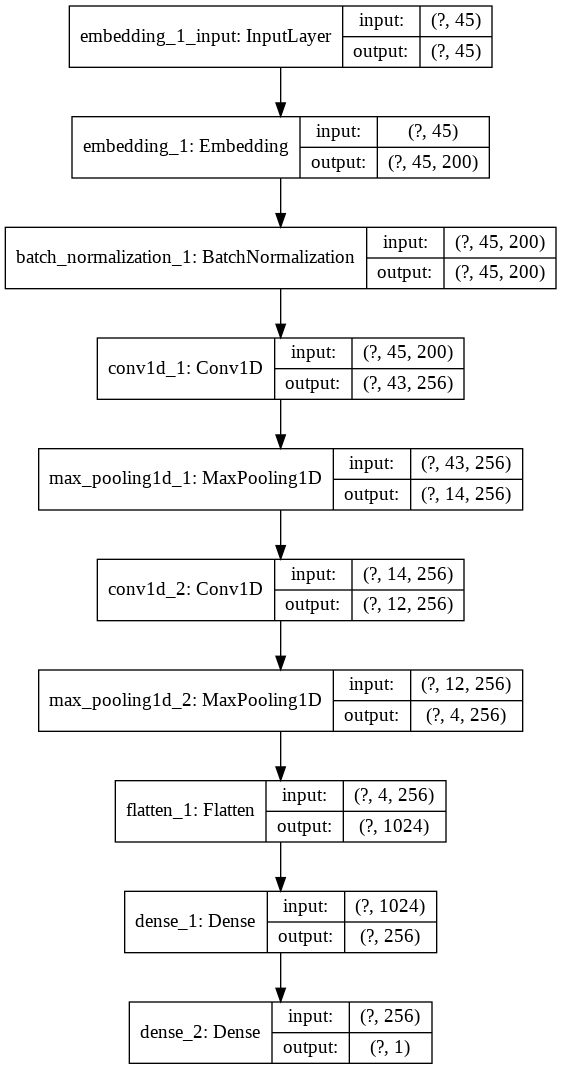

In [0]:
keras.utils.plot_model(model_cnn1a, show_shapes=True)

##### Network #3
*  Add third Conv layer

In [0]:
model_cnn1b = Sequential()
e = Embedding(100000, 200, weights=[embedding_matrix], input_length=45, trainable=False)
model_cnn1b.add(e)
model_cnn1b.add(BatchNormalization())
model_cnn1b.add(Conv1D(filters = 256, kernel_size = 2, padding='valid', activation='relu', strides=1))
model_cnn1b.add(MaxPooling1D(pool_size=pool_size))
model_cnn1b.add(Conv1D(filters = 256, kernel_size = 2, padding='valid', activation='relu', strides=1))
model_cnn1b.add(MaxPooling1D(pool_size=pool_size))
model_cnn1b.add(Conv1D(filters = 256, kernel_size = 2, padding='valid', activation='relu', strides=1))
model_cnn1b.add(MaxPooling1D(pool_size=pool_size))
model_cnn1b.add(Flatten())
model_cnn1b.add(Dense(units = 256, activation='relu'))
model_cnn1b.add(Dense(units = 1, activation='sigmoid'))

model_cnn1b.compile(optimizer=optimizer,
              loss=loss,
              metrics=metrics)

# define the checkpoint
filepath = "model_cnn1b.h5"
cnn1b_checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period = 1)

model_cnn1b.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 45, 200)           20000000  
_________________________________________________________________
batch_normalization_9 (Batch (None, 45, 200)           800       
_________________________________________________________________
conv1d_21 (Conv1D)           (None, 44, 256)           102656    
_________________________________________________________________
max_pooling1d_20 (MaxPooling (None, 14, 256)           0         
_________________________________________________________________
conv1d_22 (Conv1D)           (None, 13, 256)           131328    
_________________________________________________________________
max_pooling1d_21 (MaxPooling (None, 4, 256)            0         
_________________________________________________________________
conv1d_23 (Conv1D)           (None, 3, 256)           

##### Network #4 (Winner)
* Removing batch normalization and maxpooling layers

In [0]:
model_cnn1c = Sequential()
e = Embedding(100000, 200, weights=[embedding_matrix], input_length=45, trainable=False)
model_cnn1c.add(e)
model_cnn1c.add(Conv1D(filters = 256, kernel_size = 3, padding='valid', activation='relu', strides=1))
model_cnn1c.add(Conv1D(filters = 256, kernel_size = 3, padding='valid', activation='relu', strides=1))
model_cnn1c.add(Flatten())
model_cnn1c.add(Dense(units = 256, activation='relu'))
model_cnn1c.add(Dense(units = 1, activation='sigmoid'))

model_cnn1c.compile(optimizer=optimizer,
              loss=loss,
              metrics=metrics)

# define the checkpoint
filepath = "model_cnn1c.h5"
cnn1c_checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period = 1)

model_cnn1c.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 45, 200)           20000000  
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 43, 256)           153856    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 41, 256)           196864    
_________________________________________________________________
flatten_1 (Flatten)          (None, 10496)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2687232   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 23,038,209
Trainable params: 3,038,209
Non-trainable params: 20,000,000
__________________________________

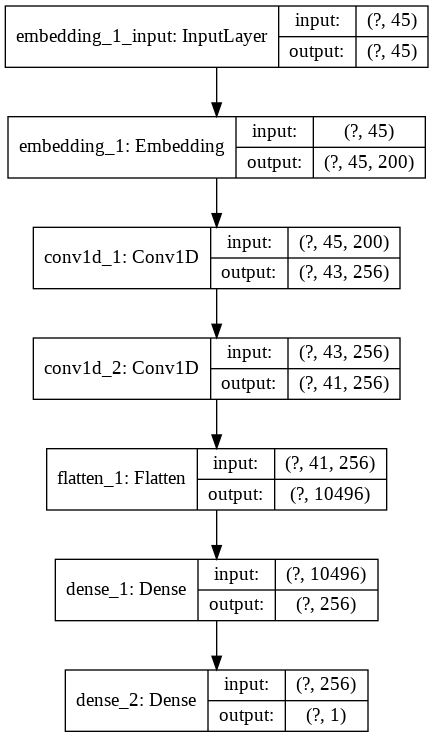

In [0]:
keras.utils.plot_model(model_cnn1c, show_shapes=True)

#### Train Model

##### Training for Network #1

In [0]:
train_rt = TrainRuntimeCallback()
cbs = [cnn1_checkpoint, train_rt, keras.callbacks.EarlyStopping(patience=patience, restore_best_weights = True)]

history_cnn1 = model_cnn1.fit(x_train_seq,
                    y_train,
                    callbacks=cbs,
                    epochs=num_epochs,
                    batch_size=batch_size,
                    validation_data=(x_val_seq, y_validation))

Train on 1564120 samples, validate on 15960 samples
Epoch 1/10
1564120/1564120 [==============================] - 286s 183us/step - loss: 0.4787 - accuracy: 0.7726 - val_loss: 0.4993 - val_accuracy: 0.7585
Epoch 2/10
1564120/1564120 [==============================] - 283s 181us/step - loss: 0.4677 - accuracy: 0.7809 - val_loss: 0.4834 - val_accuracy: 0.7680
Epoch 3/10
1564120/1564120 [==============================] - 284s 182us/step - loss: 0.4695 - accuracy: 0.7802 - val_loss: 0.5491 - val_accuracy: 0.7429
Epoch 4/10
1564120/1564120 [==============================] - 284s 181us/step - loss: 0.4688 - accuracy: 0.7805 - val_loss: 0.4631 - val_accuracy: 0.7820
Epoch 5/10
1564120/1564120 [==============================] - 285s 182us/step - loss: 0.4685 - accuracy: 0.7810 - val_loss: 0.4633 - val_accuracy: 0.7832
Epoch 6/10
1564120/1564120 [==============================] - 285s 182us/step - loss: 0.4676 - accuracy: 0.7818 - val_loss: 0.4579 - val_accuracy: 0.7870
Epoch 7/10
1564120/15641

##### Training for Network #2

In [0]:
train_rt = TrainRuntimeCallback()
cbs = [cnn1a_checkpoint, train_rt, keras.callbacks.EarlyStopping(patience=patience, restore_best_weights = True)]

history_cnn1a = model_cnn1a.fit(x_train_seq,
                    y_train,
                    callbacks=cbs,
                    epochs=num_epochs,
                    batch_size=batch_size,
                    validation_data=(x_val_seq, y_validation))

Train on 1564120 samples, validate on 15960 samples
Epoch 1/10
1564120/1564120 [==============================] - 452s 289us/step - loss: 0.4773 - accuracy: 0.7743 - val_loss: 0.4782 - val_accuracy: 0.7701
Epoch 2/10
1564120/1564120 [==============================] - 399s 255us/step - loss: 0.4697 - accuracy: 0.7800 - val_loss: 0.4911 - val_accuracy: 0.7627
Epoch 3/10
1564120/1564120 [==============================] - 405s 259us/step - loss: 0.4680 - accuracy: 0.7809 - val_loss: 0.5064 - val_accuracy: 0.7568
Epoch 4/10
1564120/1564120 [==============================] - 426s 272us/step - loss: 0.4667 - accuracy: 0.7820 - val_loss: 0.4597 - val_accuracy: 0.7858
Epoch 5/10
1564120/1564120 [==============================] - 410s 262us/step - loss: 0.4677 - accuracy: 0.7821 - val_loss: 0.4823 - val_accuracy: 0.7823
Epoch 6/10
1564120/1564120 [==============================] - 392s 250us/step - loss: 0.4682 - accuracy: 0.7818 - val_loss: 0.4606 - val_accuracy: 0.7869
Epoch 7/10
1564120/15641

##### Training for Network #2 (with higher batch size)

In [0]:
train_rt = TrainRuntimeCallback()
cbs = [cnn1a_checkpoint, train_rt, keras.callbacks.EarlyStopping(patience=patience, restore_best_weights = True)]

history_cnn1a = model_cnn1a.fit(x_train_seq,
                    y_train,
                    callbacks=cbs,
                    epochs=num_epochs,
                    batch_size=256,
                    validation_data=(x_val_seq, y_validation))

Train on 1564120 samples, validate on 15960 samples
Epoch 1/10
1564120/1564120 [==============================] - 237s 152us/step - loss: 0.4454 - accuracy: 0.7927 - val_loss: 0.4505 - val_accuracy: 0.7888
Epoch 2/10
1564120/1564120 [==============================] - 231s 148us/step - loss: 0.4401 - accuracy: 0.7958 - val_loss: 0.4459 - val_accuracy: 0.7949
Epoch 3/10
1564120/1564120 [==============================] - 228s 146us/step - loss: 0.4376 - accuracy: 0.7975 - val_loss: 0.4425 - val_accuracy: 0.7962
Epoch 4/10
1564120/1564120 [==============================] - 228s 146us/step - loss: 0.4360 - accuracy: 0.7983 - val_loss: 0.4360 - val_accuracy: 0.8003
Epoch 5/10
1564120/1564120 [==============================] - 228s 146us/step - loss: 0.4344 - accuracy: 0.7995 - val_loss: 0.4403 - val_accuracy: 0.7959
Epoch 6/10
1564120/1564120 [==============================] - 233s 149us/step - loss: 0.4337 - accuracy: 0.8001 - val_loss: 0.4452 - val_accuracy: 0.7934
Epoch 7/10
1564120/15641

##### Training for Network #3
* Adding 3rd Conv layer
* Using batch size of 256 (since this higher batch size performed better in training for network #2)


In [0]:
train_rt = TrainRuntimeCallback()
cbs = [cnn1b_checkpoint, train_rt, keras.callbacks.EarlyStopping(patience=patience, restore_best_weights = True)]

history_cnn1b = model_cnn1b.fit(x_train_seq,
                    y_train,
                    callbacks=cbs,
                    epochs=3,
                    batch_size=256,
                    validation_data=(x_val_seq, y_validation))

Train on 1564120 samples, validate on 15960 samples
Epoch 1/3
1564120/1564120 [==============================] - 219s 140us/step - loss: 0.5664 - accuracy: 0.6946 - val_loss: 0.5769 - val_accuracy: 0.6912
Epoch 2/3
1564120/1564120 [==============================] - 218s 140us/step - loss: 0.5640 - accuracy: 0.6970 - val_loss: 0.5987 - val_accuracy: 0.6566
Epoch 3/3
1564120/1564120 [==============================] - 219s 140us/step - loss: 0.5617 - accuracy: 0.6982 - val_loss: 0.6257 - val_accuracy: 0.6768


##### Training for Network #4

In [0]:
train_rt = TrainRuntimeCallback()
cbs = [cnn1c_checkpoint, train_rt, keras.callbacks.EarlyStopping(patience=patience, restore_best_weights = True)]

history_cnn1c = model_cnn1c.fit(x_train_seq,
                    y_train,
                    callbacks=cbs,
                    epochs=num_epochs,
                    batch_size=256,
                    validation_data=(x_val_seq, y_validation))

Train on 1564120 samples, validate on 15960 samples
Epoch 1/10
1564120/1564120 [==============================] - 285s 183us/step - loss: 0.4182 - accuracy: 0.8089 - val_loss: 0.3923 - val_accuracy: 0.8222
Epoch 2/10
1564120/1564120 [==============================] - 288s 184us/step - loss: 0.3864 - accuracy: 0.8274 - val_loss: 0.3740 - val_accuracy: 0.8330
Epoch 3/10
1564120/1564120 [==============================] - 287s 183us/step - loss: 0.3752 - accuracy: 0.8337 - val_loss: 0.3737 - val_accuracy: 0.8370
Epoch 4/10
1564120/1564120 [==============================] - 284s 182us/step - loss: 0.3692 - accuracy: 0.8376 - val_loss: 0.3761 - val_accuracy: 0.8359
Epoch 5/10
1564120/1564120 [==============================] - 283s 181us/step - loss: 0.3629 - accuracy: 0.8410 - val_loss: 0.3782 - val_accuracy: 0.8355
Epoch 6/10
1564120/1564120 [==============================] - 288s 184us/step - loss: 0.3611 - accuracy: 0.8435 - val_loss: 0.3869 - val_accuracy: 0.8369


##### Train Time

In [0]:
# Get the training time
train_time = train_rt.process_time
train_time # in seconds

1719.132222

In [0]:
print(f"train_acc: {history_cnn1c.history['accuracy'][-1]}, val_acc: {history_cnn1c.history['val_accuracy'][-1]}")

train_acc: 0.8434506058692932, val_acc: 0.836904764175415


#### Save Model

In [0]:
# save model
model_cnn1c.save('model_cnn1c.h5') 

#### Test Model

In [0]:
test_rt = TestRuntimeCallback()
# test_loss, test_acc = model.evaluate(test_data_sm_cnn, one_hot_test_labels_sm, callbacks=[test_rt])

# test_loss, test_accuracy = model.evaluate(test_data_sm_cnn, one_hot_test_labels_sm, callbacks=[test_rt])

test_loss, test_acc = model_cnn1c.evaluate(x_test_seq, y_test, callbacks = [test_rt])

print(f"test_accuracy={test_acc}, test_loss={test_loss}")

15961/15961 [==============================] - 2s 150us/step
test_accuracy=0.8251989483833313, test_loss=0.3898659624739567


In [0]:
# Get the test time
test_time = test_rt.process_time
test_time # in seconds

2.388911

In [0]:
history_dict = history_cnn1c.history
history_dict['train_accuracy'] = history_dict.pop('accuracy') # rename the the key to 'train_accuracy'
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'train_accuracy'])

In [0]:
import pandas as pd
history_df=pd.DataFrame(history_dict)
history_df['test_accuracy'] = test_acc
history_df = history_df.iloc[-1:]
history_df.tail()

,val_loss,val_accuracy,loss,train_accuracy,test_accuracy
5,0.386908,0.836905,0.361147,0.843451,0.825199


#### Save Performance to Dataframe

In [0]:
results_df = history_df.iloc[-1:].copy()
results_df.insert(0,'model','1D CNN') # want the model name to appear first
results_df['test_accuracy'] = test_acc   # test accuracy
results_df['training time (sec)'] = train_time      # we are okay with training time appearing last
results_df['testing time (sec)'] = test_time      # we are okay with test time appearing last
results_df

,model,val_loss,val_accuracy,loss,train_accuracy,test_accuracy,training time (sec),testing time (sec)
5,1D CNN,0.386908,0.836905,0.361147,0.843451,0.825199,1719.132222,2.388911


Appending metrics to the combined metrics dataframe to ensure the data is captured appropriately. Since training time is so long for these models, I decided to append the performance metrics immediately after each training session.

In [0]:
prev_results_df = pd.read_pickle('results3.pkl')
results_df = prev_results_df.append(results_df,ignore_index=True)
results_df

,model,val_loss,val_accuracy,loss,train_accuracy,test_accuracy,training time (sec),testing time (sec)
0,DNN (3 layers),0.426255,0.812845,0.384176,0.833952,0.810851,2517.518805,5.990464
1,DNN w/ Dropout,0.419115,0.818296,0.417987,0.817185,0.810225,2517.518805,6.026241
2,DNN w/ Word Embeddings,0.442434,0.795489,0.428079,0.808861,0.787670,1030.219377,0.851879
3,Simple RNN,0.469121,0.782143,0.439075,0.800082,0.801892,1834.569555,1.979959
4,RNN w/ Dropout,0.511496,0.751253,0.553732,0.717752,0.774513,1834.569555,2.334067
5,RNN w/ Trainable Word Embeddings,0.416349,0.815915,0.412151,0.818388,0.811415,1834.569555,2.233131
6,LSTM RNN,0.367552,0.842231,0.351738,0.846655,0.827642,10874.661124,8.230267
7,LSTM w/ Dropout,0.391736,0.825501,0.419856,0.811179,0.815989,8618.040833,10.184501
8,LSTM w/ Trainable Word Embeddings,0.365883,0.842168,0.358121,0.843683,0.831903,3845.252216,10.213246
9,1D CNN,0.386908,0.836905,0.361147,0.843451,0.825199,1719.132222,2.388911


#### Plot Performance

dict_keys(['val_loss', 'val_accuracy', 'loss', 'train_accuracy'])


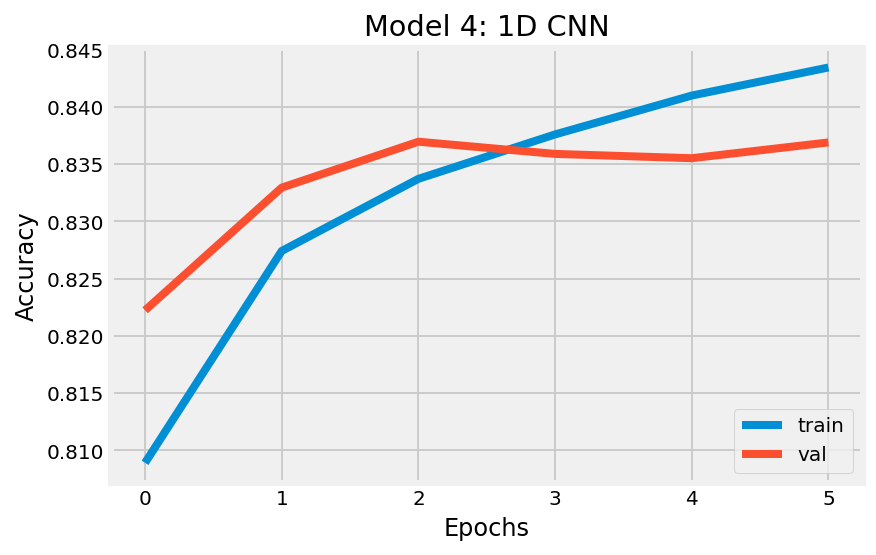

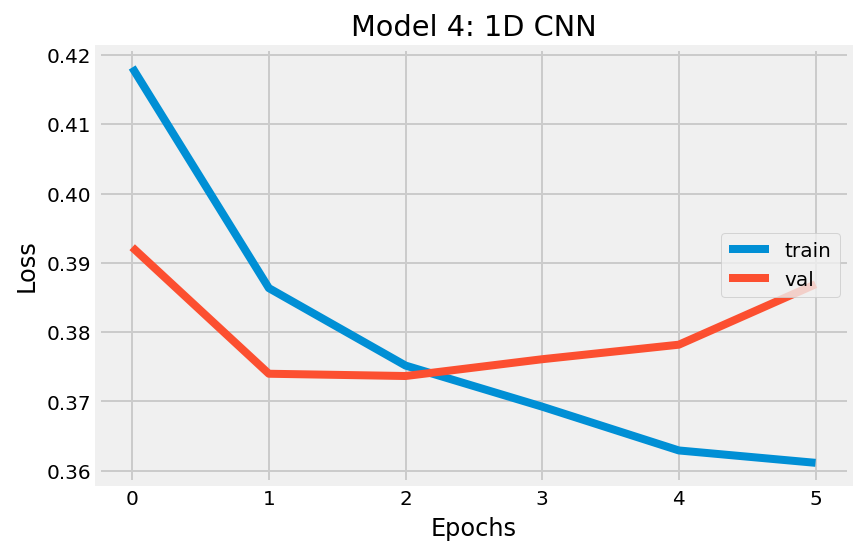

In [0]:
import matplotlib.pyplot as plt

# list all data in history
print(history_cnn1c.history.keys())

# summarize history for accuracy
plt.plot(history_cnn1c.history['train_accuracy'])
plt.plot(history_cnn1c.history['val_accuracy'])
plt.title('Model 4: 1D CNN')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

# summarize history for loss
plt.plot(history_cnn1c.history['loss'])
plt.plot(history_cnn1c.history['val_loss'])
plt.title('Model 4: 1D CNN')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'], loc='center right')
plt.show()

# from google.colab import files
# plt.savefig("model_v5_history.png")

### 1D CNN w/ Dropout (Using Pre-Trained Word Embeddings)

#### Build Network

This model includes a 20% dropout in between network layers. The purpose of the dropout layer is to reduce overfitting.

In [0]:
model_cnn2 = Sequential()
e = Embedding(100000, 200, weights=[embedding_matrix], input_length=45, trainable=False)
model_cnn2.add(e)
model_cnn2.add(Conv1D(filters = 256, kernel_size = 3, padding='valid', activation='relu', strides=1))
model_cnn2.add(Dropout(dropout))
model_cnn2.add(Conv1D(filters = 256, kernel_size = 3, padding='valid', activation='relu', strides=1))
model_cnn2.add(Dropout(dropout))
model_cnn2.add(Flatten())
model_cnn2.add(Dense(units = 256, activation='relu'))
model_cnn2.add(Dense(units = 1, activation='sigmoid'))

model_cnn2.compile(optimizer=optimizer,
              loss=loss,
              metrics=metrics)

# define the checkpoint
filepath = "model_cnn2.h5"
cnn2_checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period = 1)

model_cnn2.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 45, 200)           20000000  
_________________________________________________________________
conv1d_28 (Conv1D)           (None, 43, 256)           153856    
_________________________________________________________________
dropout_3 (Dropout)          (None, 43, 256)           0         
_________________________________________________________________
conv1d_29 (Conv1D)           (None, 41, 256)           196864    
_________________________________________________________________
dropout_4 (Dropout)          (None, 41, 256)           0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 10496)             0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)             

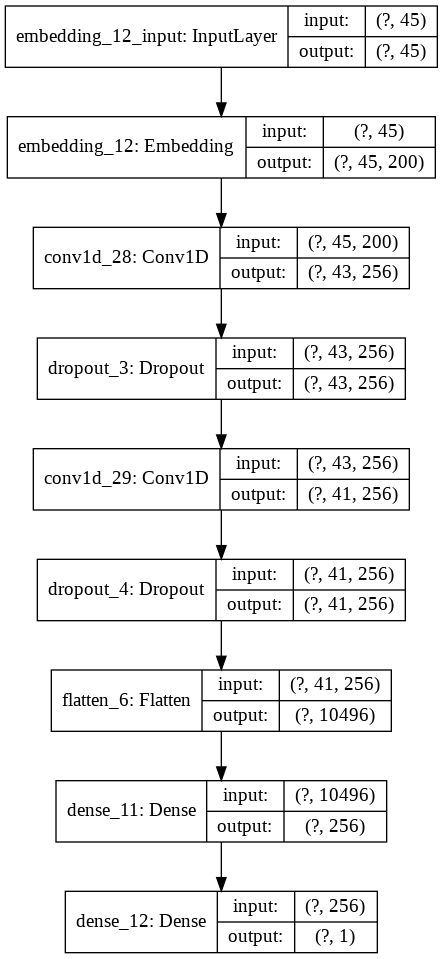

In [0]:
keras.utils.plot_model(model_cnn2, show_shapes=True)

#### Train Model

In [0]:
train_rt = TrainRuntimeCallback()
cbs = [cnn2_checkpoint, train_rt, keras.callbacks.EarlyStopping(patience=patience, restore_best_weights = True)]

history_cnn2 = model_cnn2.fit(x_train_seq,
                    y_train,
                    callbacks=cbs,
                    epochs=num_epochs,
                    batch_size=batch_size,
                    validation_data=(x_val_seq, y_validation))

Train on 1564120 samples, validate on 15960 samples
Epoch 1/10
1564120/1564120 [==============================] - 350s 224us/step - loss: 0.4307 - accuracy: 0.8016 - val_loss: 0.3878 - val_accuracy: 0.8272
Epoch 2/10
1564120/1564120 [==============================] - 339s 217us/step - loss: 0.3998 - accuracy: 0.8200 - val_loss: 0.3812 - val_accuracy: 0.8336
Epoch 3/10
1564120/1564120 [==============================] - 334s 214us/step - loss: 0.3920 - accuracy: 0.8248 - val_loss: 0.3753 - val_accuracy: 0.8345
Epoch 4/10
1564120/1564120 [==============================] - 334s 214us/step - loss: 0.3874 - accuracy: 0.8279 - val_loss: 0.3726 - val_accuracy: 0.8366
Epoch 5/10
1564120/1564120 [==============================] - 336s 215us/step - loss: 0.3843 - accuracy: 0.8303 - val_loss: 0.3774 - val_accuracy: 0.8371
Epoch 6/10
1564120/1564120 [==============================] - 342s 219us/step - loss: 0.3820 - accuracy: 0.8319 - val_loss: 0.3696 - val_accuracy: 0.8397
Epoch 7/10
1564120/15641

In [0]:
# Get the training time
train_time = train_rt.process_time
train_time # in seconds

3063.107668

In [0]:
print(f"train_acc: {history_cnn2.history['accuracy'][-1]}, val_acc: {history_cnn2.history['val_accuracy'][-1]}")

train_acc: 0.8353144526481628, val_acc: 0.8376566171646118


#### Save Model

In [0]:
# save model
model_cnn2.save('model_cnn2.h5') 

#### Test Model

In [0]:
test_rt = TestRuntimeCallback()

test_loss, test_acc = model_cnn2.evaluate(x_test_seq, y_test, callbacks = [test_rt])

print(f"test_accuracy={test_acc}, test_loss={test_loss}")

15961/15961 [==============================] - 2s 150us/step
test_accuracy=0.8282688856124878, test_loss=0.3874442618869837


In [0]:
# Get the test time
test_time = test_rt.process_time
test_time # in seconds

2.398423

In [0]:
history_dict = history_cnn2.history
history_dict['train_accuracy'] = history_dict.pop('accuracy') # rename the the key to 'train_accuracy'
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'train_accuracy'])

In [0]:
import pandas as pd
history_df=pd.DataFrame(history_dict)
history_df['test_accuracy'] = test_acc   # using the test accuracy for smaller dataset model, NOT the full model
history_df = history_df.iloc[-1:]
history_df.tail()

,val_loss,val_accuracy,loss,train_accuracy,test_accuracy
8,0.373042,0.837657,0.376232,0.835314,0.828269


#### Save Performance to Dataframe

In [0]:
results_df_v2 = history_df.iloc[-1:].copy()
results_df_v2.insert(0,'model',' 1D CNN w/ Dropout') # went the model name to appear first
results_df_v2['test_accuracy'] = test_acc
results_df_v2['training time (sec)'] = train_time      # we are okay with training time appearing last
results_df_v2['testing time (sec)'] = test_time      # we are okay with training time appearing last
results_df_v2

,model,val_loss,val_accuracy,loss,train_accuracy,test_accuracy,training time (sec),testing time (sec)
8,1D CNN w/ Dropout,0.373042,0.837657,0.376232,0.835314,0.828269,3063.107668,2.398423


In [0]:
results_df = results_df.append(results_df_v2,ignore_index=True)
results_df

,model,val_loss,val_accuracy,loss,train_accuracy,test_accuracy,training time (sec),testing time (sec)
0,DNN (3 layers),0.426255,0.812845,0.384176,0.833952,0.810851,2517.518805,5.990464
1,DNN w/ Dropout,0.419115,0.818296,0.417987,0.817185,0.810225,2517.518805,6.026241
2,DNN w/ Word Embeddings,0.442434,0.795489,0.428079,0.808861,0.787670,1030.219377,0.851879
3,Simple RNN,0.469121,0.782143,0.439075,0.800082,0.801892,1834.569555,1.979959
4,RNN w/ Dropout,0.511496,0.751253,0.553732,0.717752,0.774513,1834.569555,2.334067
5,RNN w/ Trainable Word Embeddings,0.416349,0.815915,0.412151,0.818388,0.811415,1834.569555,2.233131
6,LSTM RNN,0.367552,0.842231,0.351738,0.846655,0.827642,10874.661124,8.230267
7,LSTM w/ Dropout,0.391736,0.825501,0.419856,0.811179,0.815989,8618.040833,10.184501
8,LSTM w/ Trainable Word Embeddings,0.365883,0.842168,0.358121,0.843683,0.831903,3845.252216,10.213246
9,1D CNN,0.386908,0.836905,0.361147,0.843451,0.825199,1719.132222,2.388911


#### Plot Performance

dict_keys(['val_loss', 'val_accuracy', 'loss', 'train_accuracy'])


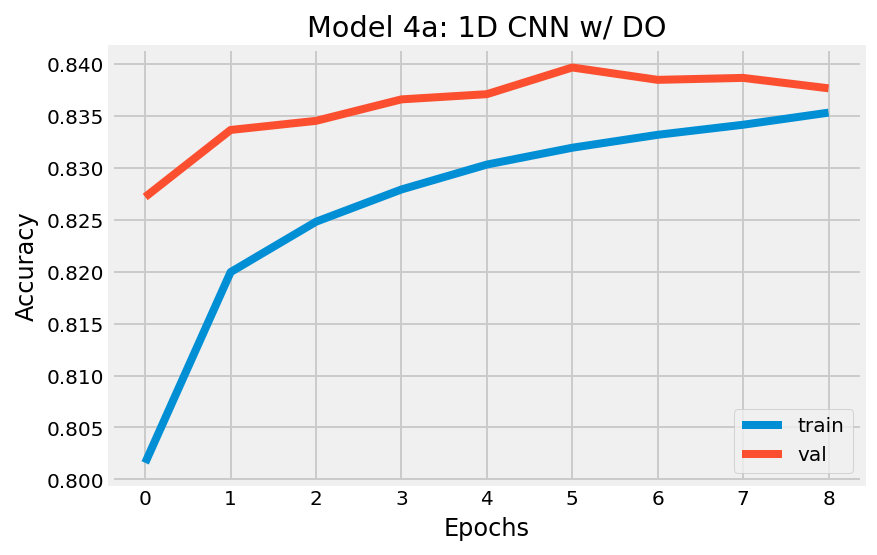

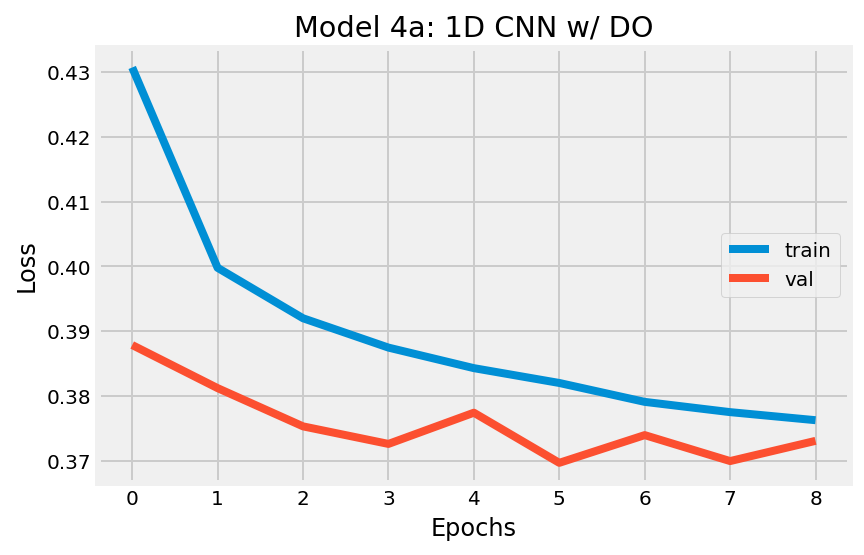

In [0]:
import matplotlib.pyplot as plt

# list all data in history
print(history_cnn2.history.keys())

# summarize history for accuracy
plt.plot(history_cnn2.history['train_accuracy'])
plt.plot(history_cnn2.history['val_accuracy'])
plt.title('Model 4a: 1D CNN w/ DO')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

# summarize history for loss
plt.plot(history_cnn2.history['loss'])
plt.plot(history_cnn2.history['val_loss'])
plt.title('Model 4a: 1D CNN w/ DO')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'], loc='center right')
plt.show()

Sample Code for Loaded Model

In [0]:
# # load model
# model_nn2_load = load_model("model_nn2.h5")

# # define checkpoint to save model after each epoch
# filepath = "model_nn2.h5"
# nn2_checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='max', save_freq='epoch')

# #train the model
# history_nn2 = model_nn2_load.fit_generator(generator=batch_generator(x_train_tfidf, y_train, 32),
#                     epochs=1, validation_data=(x_validation_tfidf, y_validation),
#                     steps_per_epoch=x_train_tfidf.shape[0]/32, callbacks=[nn2_checkpoint])

In [0]:
# # load model
# model_nn2_load = load_model("model_nn2.h5")

### 1D CNN w/ Trainable Word Embeddings

*   Trainable = True in Word Embeddings
*   No Dropout



#### Build Network

In [0]:
model_cnn3 = Sequential()
e = Embedding(100000, 200, weights=[embedding_matrix], input_length=45, trainable=True)
model_cnn3.add(e)
model_cnn3.add(Conv1D(filters = 256, kernel_size = 3, padding='valid', activation='relu', strides=1))
model_cnn3.add(Conv1D(filters = 256, kernel_size = 3, padding='valid', activation='relu', strides=1))
model_cnn3.add(Flatten())
model_cnn3.add(Dense(units = 256, activation='relu'))
model_cnn3.add(Dense(units = 1, activation='sigmoid'))

model_cnn3.compile(optimizer=optimizer,
              loss=loss,
              metrics=metrics)

# define the checkpoint
filepath = "model_cnn3.h5"
cnn3_checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period = 1)

model_cnn3.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, 45, 200)           20000000  
_________________________________________________________________
conv1d_34 (Conv1D)           (None, 43, 256)           153856    
_________________________________________________________________
conv1d_35 (Conv1D)           (None, 41, 256)           196864    
_________________________________________________________________
flatten_9 (Flatten)          (None, 10496)             0         
_________________________________________________________________
dense_17 (Dense)             (None, 256)               2687232   
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 257       
Total params: 23,038,209
Trainable params: 23,038,209
Non-trainable params: 0
_________________________________________

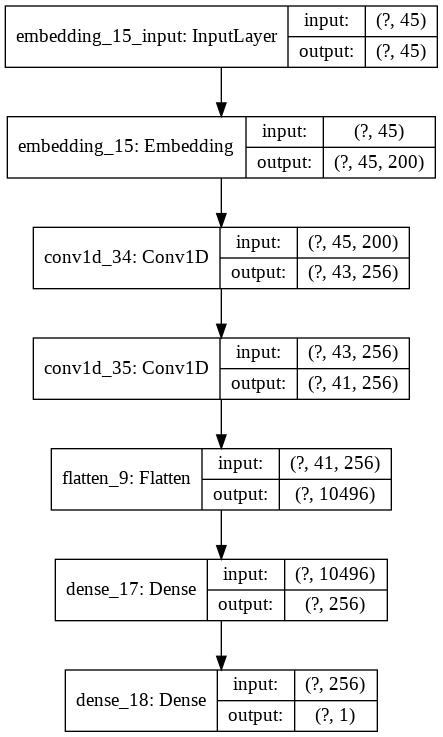

In [0]:
keras.utils.plot_model(model_cnn3, show_shapes=True)

#### Train Model

In [0]:
train_rt = TrainRuntimeCallback()
cbs = [cnn3_checkpoint, train_rt, keras.callbacks.EarlyStopping(patience=patience, restore_best_weights = True)]

history_cnn3 = model_cnn3.fit(x_train_seq,
                    y_train,
                    callbacks=cbs,
                    epochs=num_epochs,
                    batch_size=batch_size,
                    validation_data=(x_val_seq, y_validation))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1564120 samples, validate on 15960 samples
Epoch 1/10
1564120/1564120 [==============================] - 706s 451us/step - loss: 0.4064 - accuracy: 0.8164 - val_loss: 0.3740 - val_accuracy: 0.8347
Epoch 2/10
1564120/1564120 [==============================] - 712s 455us/step - loss: 0.3720 - accuracy: 0.8358 - val_loss: 0.3618 - val_accuracy: 0.8423
Epoch 3/10
1564120/1564120 [==============================] - 701s 448us/step - loss: 0.3597 - accuracy: 0.8431 - val_loss: 0.3837 - val_accuracy: 0.8326
Epoch 4/10
1564120/1564120 [==============================] - 699s 447us/step - loss: 0.3514 - accuracy: 0.8487 - val_loss: 0.3731 - val_accuracy: 0.8406
Epoch 5/10
1564120/1564120 [==============================] - 708s 452us/step - loss: 0.3516 - accuracy: 0.8530 - val_loss: 0.3627 - val_accuracy: 0.8439


In [0]:
# Get the training time
train_time = train_rt.process_time
train_time # in seconds

3530.781898

In [0]:
print(f"train_acc: {history_cnn3.history['accuracy'][-1]}, val_acc: {history_cnn3.history['val_accuracy'][-1]}")

train_acc: 0.8529946804046631, val_acc: 0.8438596725463867


#### Save Model

In [0]:
# save model
model_cnn3.save('model_cnn3.h5') 

#### Training Cont... **RUN ONLY IF YOU NEED TO COMPLETE MORE EPOCHS**

Load model and continue training

In [0]:
# load model
model_rnn3_load = load_model('model_rnn3.h5')

# define the checkpoint
filepath = "model_rnn3.h5"
rnn3_checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period = 1)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Model has completed 2 epochs already. Continuing training with 2 more epochs. I'm using this model checkpoint approach since the training time takes so long.

In [0]:
train_rt = TrainRuntimeCallback()
cbs = [rnn3_checkpoint, train_rt, keras.callbacks.EarlyStopping(patience=patience, restore_best_weights = True)]

history_rnn3 = model_rnn3_load.fit(x_train_seq,
                    y_train,
                    callbacks=cbs,
                    epochs=2,
                    batch_size=batch_size,
                    validation_data=(x_val_seq, y_validation))

Train on 1564120 samples, validate on 15960 samples
Epoch 1/2
 991552/1564120 [==================>...........] - ETA: 13:19 - loss: 0.4080 - accuracy: 0.8185

In [0]:
# save model
model_rnn3_load.save('model_rnn3.h5') 

#### Test Model

In [0]:
test_rt = TestRuntimeCallback()

test_loss, test_acc = model_cnn3.evaluate(x_test_seq, y_test, callbacks = [test_rt])

print(f"test_accuracy={test_acc}, test_loss={test_loss}")

15961/15961 [==============================] - 3s 157us/step
test_accuracy=0.8324666619300842, test_loss=0.3781971690999962


In [0]:
# Get the test time
test_time = test_rt.process_time
test_time # in seconds

2.504705

In [0]:
history_dict = history_cnn3.history
history_dict['train_accuracy'] = history_dict.pop('accuracy') # rename the the key to 'train_accuracy'
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'train_accuracy'])

In [0]:
import pandas as pd
history_df=pd.DataFrame(history_dict)
history_df['test_accuracy'] = test_acc   # using the test accuracy for smaller dataset model, NOT the full model
history_df = history_df.iloc[-1:]
history_df.tail()

,val_loss,val_accuracy,loss,train_accuracy,test_accuracy
4,0.362693,0.84386,0.351614,0.852995,0.832467


#### Save Performance to Dataframe

In [0]:
results_df_v3 = history_df.iloc[-1:].copy()
results_df_v3.insert(0,'model','CNN w/ Trainable Word Embeddings') # went the model name to appear first
results_df_v3['test_accuracy'] = test_acc
results_df_v3['training time (sec)'] = train_time      # we are okay with training time appearing last
results_df_v3['testing time (sec)'] = test_time      # we are okay with training time appearing last
results_df_v3

,model,val_loss,val_accuracy,loss,train_accuracy,test_accuracy,training time (sec),testing time (sec)
4,CNN w/ Trainable Word Embeddings,0.362693,0.84386,0.351614,0.852995,0.832467,3530.781898,2.504705


In [0]:
results_df = results_df.append(results_df_v3,ignore_index=True)
results_df

#### Plot Performance

dict_keys(['val_loss', 'val_accuracy', 'loss', 'train_accuracy'])


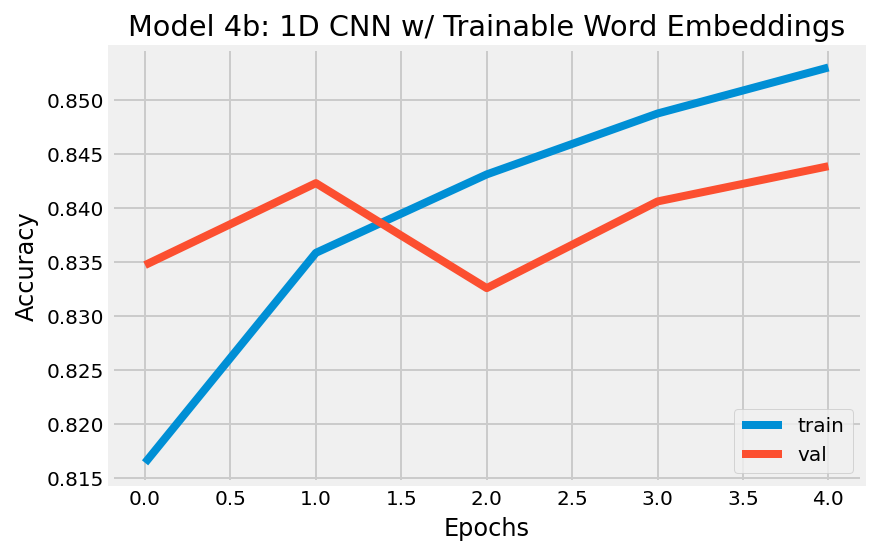

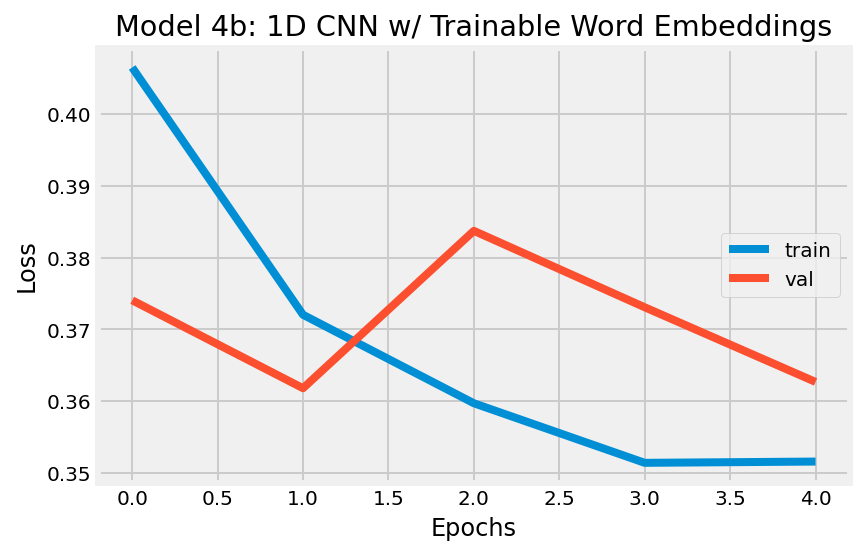

In [0]:
import matplotlib.pyplot as plt

# list all data in history
print(history_cnn3.history.keys())

# summarize history for accuracy
plt.plot(history_cnn3.history['train_accuracy'])
plt.plot(history_cnn3.history['val_accuracy'])
plt.title('Model 4b: 1D CNN w/ Trainable Word Embeddings')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

# summarize history for loss
plt.plot(history_cnn3.history['loss'])
plt.plot(history_cnn3.history['val_loss'])
plt.title('Model 4b: 1D CNN w/ Trainable Word Embeddings')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'], loc='center right')
plt.show()

### 1D CNN w/ Trainable Word Embeddings + Dropout

#### Build Network

In [0]:
model_cnn4 = Sequential()
e = Embedding(100000, 200, weights=[embedding_matrix], input_length=45, trainable=True)
model_cnn4.add(e)
model_cnn4.add(Conv1D(filters = 256, kernel_size = 3, padding='valid', activation='relu', strides=1))
model_cnn4.add(Dropout(dropout))
model_cnn4.add(Conv1D(filters = 256, kernel_size = 3, padding='valid', activation='relu', strides=1))
model_cnn4.add(Dropout(dropout))
model_cnn4.add(Flatten())
model_cnn4.add(Dense(units = 256, activation='relu'))
model_cnn4.add(Dense(units = 1, activation='sigmoid'))

model_cnn4.compile(optimizer=optimizer,
              loss=loss,
              metrics=metrics)

# define the checkpoint
filepath = "model_cnn4.h5"
cnn4_checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period = 1)

model_cnn4.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_16 (Embedding)     (None, 45, 200)           20000000  
_________________________________________________________________
conv1d_36 (Conv1D)           (None, 43, 256)           153856    
_________________________________________________________________
dropout_5 (Dropout)          (None, 43, 256)           0         
_________________________________________________________________
conv1d_37 (Conv1D)           (None, 41, 256)           196864    
_________________________________________________________________
dropout_6 (Dropout)          (None, 41, 256)           0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 10496)             0         
_________________________________________________________________
dense_19 (Dense)             (None, 256)             

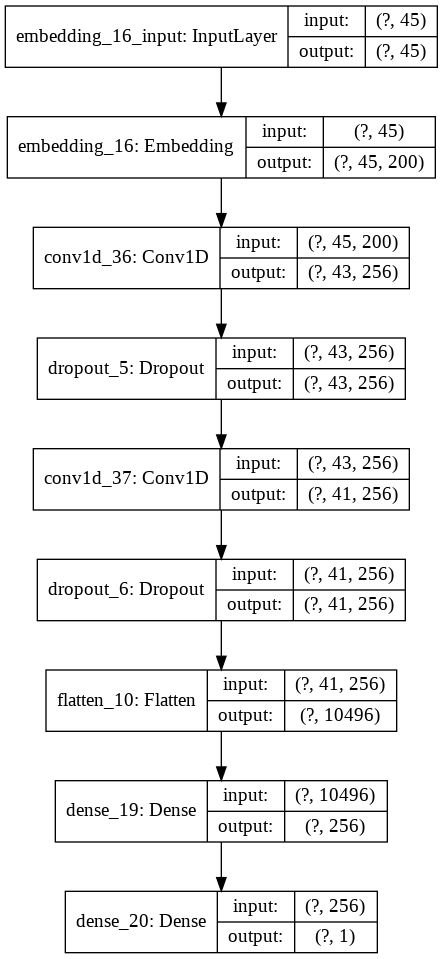

In [0]:
keras.utils.plot_model(model_cnn4, show_shapes=True)

#### Train Model

In [0]:
train_rt = TrainRuntimeCallback()
cbs = [cnn4_checkpoint, train_rt, keras.callbacks.EarlyStopping(patience=patience, restore_best_weights = True)]

history_cnn4 = model_cnn4.fit(x_train_seq,
                    y_train,
                    callbacks=cbs,
                    epochs=num_epochs,
                    batch_size=batch_size,
                    validation_data=(x_val_seq, y_validation))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1564120 samples, validate on 15960 samples
Epoch 1/10
1564120/1564120 [==============================] - 859s 549us/step - loss: 0.4125 - accuracy: 0.8133 - val_loss: 0.3757 - val_accuracy: 0.8338
Epoch 2/10
1564120/1564120 [==============================] - 866s 554us/step - loss: 0.3825 - accuracy: 0.8312 - val_loss: 0.3702 - val_accuracy: 0.8410
Epoch 3/10
1564120/1564120 [==============================] - 882s 564us/step - loss: 0.3738 - accuracy: 0.8366 - val_loss: 0.3666 - val_accuracy: 0.8407
Epoch 4/10
1564120/1564120 [==============================] - 862s 551us/step - loss: 0.3691 - accuracy: 0.8409 - val_loss: 0.3665 - val_accuracy: 0.8440
Epoch 5/10
1564120/1564120 [==============================] - 866s 554us/step - loss: 0.3653 - accuracy: 0.8439 - val_loss: 0.3628 - val_accuracy: 0.8417
Epoch 6/10
1564120/1564120 [==============================] - 848s 542us/step - loss: 0.3633 - accuracy: 0.8465 - val_loss: 0.3772 - val_accuracy: 0.8381
Epoch 7/10
1564120/15641

In [0]:
# Get the training time
train_time = train_rt.process_time
train_time # in seconds

6887.398819

In [0]:
print(f"train_acc: {history_cnn4.history['accuracy'][-1]}, val_acc: {history_cnn4.history['val_accuracy'][-1]}")

train_acc: 0.8491260409355164, val_acc: 0.8391603827476501


#### Save Model

In [0]:
# save model
model_cnn4.save('model_cnn4.h5') 

#### Test Model

In [0]:
test_rt = TestRuntimeCallback()

test_loss, test_acc = model_cnn4.evaluate(x_test_seq, y_test, callbacks = [test_rt])

print(f"test_accuracy={test_acc}, test_loss={test_loss}")

15961/15961 [==============================] - 2s 149us/step
test_accuracy=0.8307750225067139, test_loss=0.38469922273322293


In [0]:
# Get the test time
test_time = test_rt.process_time
test_time # in seconds

2.380261

In [0]:
history_dict = history_cnn4.history
history_dict['train_accuracy'] = history_dict.pop('accuracy') # rename the the key to 'train_accuracy'
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'train_accuracy'])

In [0]:
import pandas as pd
history_df=pd.DataFrame(history_dict)
history_df['test_accuracy'] = test_acc   # using the test accuracy for smaller dataset model, NOT the full model
history_df = history_df.iloc[-1:]
history_df.tail()

,val_loss,val_accuracy,loss,train_accuracy,test_accuracy
7,0.369299,0.83916,0.359898,0.849126,0.830775


#### Save Performance to Dataframe

In [0]:
results_df_v4 = history_df.iloc[-1:].copy()
results_df_v4.insert(0,'model','CNN w/ Trainable Word Embeddings + DO') # went the model name to appear first
results_df_v4['test_accuracy'] = test_acc
results_df_v4['training time (sec)'] = train_time      # we are okay with training time appearing last
results_df_v4['testing time (sec)'] = test_time      # we are okay with training time appearing last
results_df_v4

,model,val_loss,val_accuracy,loss,train_accuracy,test_accuracy,training time (sec),testing time (sec)
7,CNN w/ Trainable Word Embeddings + DO,0.369299,0.83916,0.359898,0.849126,0.830775,6887.398819,2.380261


#### Plot Performance

dict_keys(['val_loss', 'val_accuracy', 'loss', 'train_accuracy'])


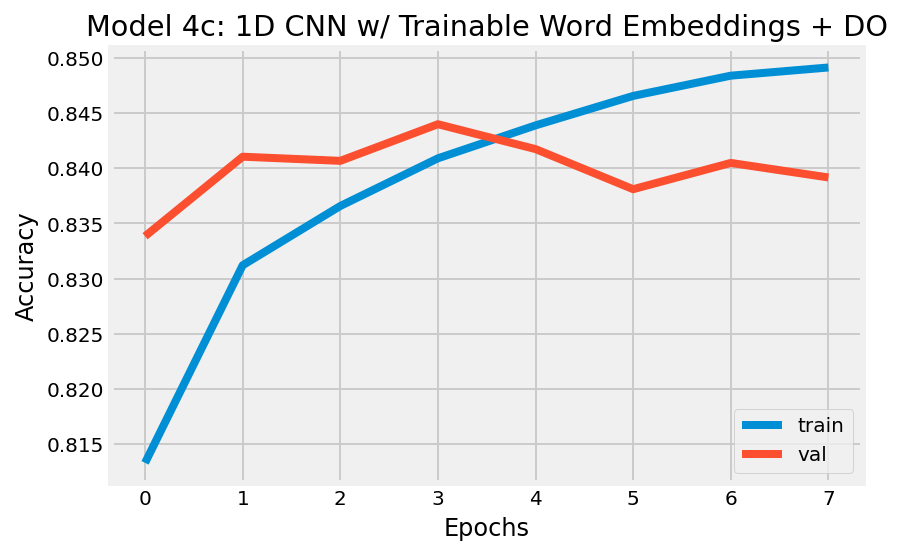

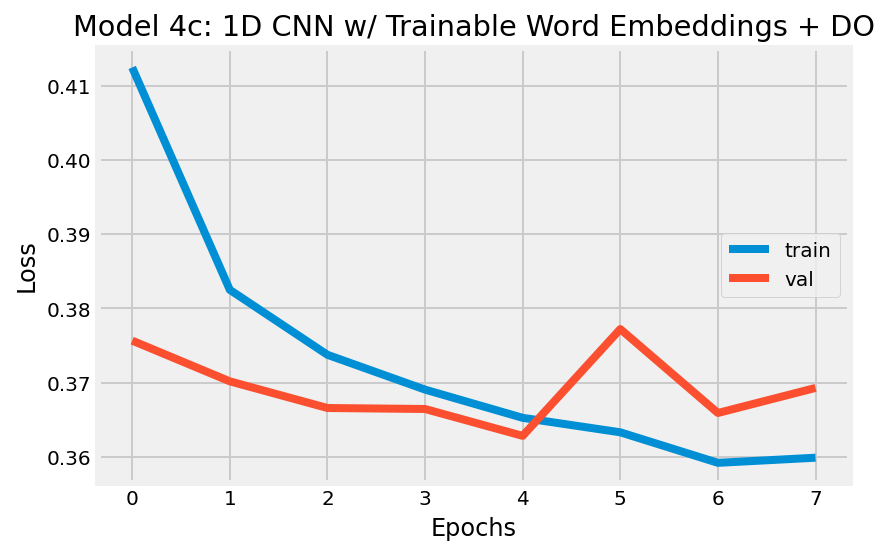

In [0]:
import matplotlib.pyplot as plt

# list all data in history
print(history_cnn4.history.keys())

# summarize history for accuracy
plt.plot(history_cnn4.history['train_accuracy'])
plt.plot(history_cnn4.history['val_accuracy'])
plt.title('Model 4c: 1D CNN w/ Trainable Word Embeddings + DO')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

# summarize history for loss
plt.plot(history_cnn4.history['loss'])
plt.plot(history_cnn4.history['val_loss'])
plt.title('Model 4c: 1D CNN w/ Trainable Word Embeddings + DO')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'], loc='center right')
plt.show()

### Save Combined Metrics to Dataframe

In [0]:
results_df = results_df.append(results_df_v4,ignore_index=True)
results_df

,model,val_loss,val_accuracy,loss,train_accuracy,test_accuracy,training time (sec),testing time (sec)
0,DNN (3 layers),0.426255,0.812845,0.384176,0.833952,0.810851,2517.518805,5.990464
1,DNN w/ Dropout,0.419115,0.818296,0.417987,0.817185,0.810225,2517.518805,6.026241
2,DNN w/ Word Embeddings,0.442434,0.795489,0.428079,0.808861,0.787670,1030.219377,0.851879
3,Simple RNN,0.469121,0.782143,0.439075,0.800082,0.801892,1834.569555,1.979959
4,RNN w/ Dropout,0.511496,0.751253,0.553732,0.717752,0.774513,1834.569555,2.334067
5,RNN w/ Trainable Word Embeddings,0.416349,0.815915,0.412151,0.818388,0.811415,1834.569555,2.233131
6,LSTM RNN,0.367552,0.842231,0.351738,0.846655,0.827642,10874.661124,8.230267
7,LSTM w/ Dropout,0.391736,0.825501,0.419856,0.811179,0.815989,8618.040833,10.184501
8,LSTM w/ Trainable Word Embeddings,0.365883,0.842168,0.358121,0.843683,0.831903,3845.252216,10.213246
9,1D CNN,0.386908,0.836905,0.361147,0.843451,0.825199,1719.132222,2.388911


In [0]:
results_df.to_pickle("results4.pkl") 

In [0]:
results_df.to_csv('results4.csv', index=False)

In [0]:
results_df = pd.read_pickle('results4.pkl')
results_df.to_csv('results4.csv', index=False)
results_df

,model,val_loss,val_accuracy,loss,train_accuracy,test_accuracy,training time (sec),testing time (sec)
0,DNN (3 layers),0.426255,0.812845,0.384176,0.833952,0.810851,2517.518805,5.990464
1,DNN w/ Dropout,0.419115,0.818296,0.417987,0.817185,0.810225,2517.518805,6.026241
2,DNN w/ Word Embeddings,0.442434,0.795489,0.428079,0.808861,0.787670,1030.219377,0.851879
3,Simple RNN,0.469121,0.782143,0.439075,0.800082,0.801892,1834.569555,1.979959
4,RNN w/ Dropout,0.511496,0.751253,0.553732,0.717752,0.774513,1834.569555,2.334067
5,RNN w/ Trainable Word Embeddings,0.416349,0.815915,0.412151,0.818388,0.811415,1834.569555,2.233131
6,LSTM RNN,0.367552,0.842231,0.351738,0.846655,0.827642,10874.661124,8.230267
7,LSTM w/ Dropout,0.391736,0.825501,0.419856,0.811179,0.815989,8618.040833,10.184501
8,LSTM w/ Trainable Word Embeddings,0.365883,0.842168,0.358121,0.843683,0.831903,3845.252216,10.213246
9,1D CNN,0.386908,0.836905,0.361147,0.843451,0.825199,1719.132222,2.388911


In [0]:
results_df.iloc[0][0]

'DNN (3 layers)'

In [0]:
results_df.loc[0][0]

'DNN (3 layers)'

In [0]:
results_df.replace("DNN (3 layers)", 
           "DNN", 
           inplace=True)

In [0]:
results_df.replace("LSTM RNN", 
           "LSTM", 
           inplace=True)

In [0]:
results_df

,model,val_loss,val_accuracy,loss,train_accuracy,test_accuracy,training time (sec),testing time (sec)
0,DNN,0.426255,0.812845,0.384176,0.833952,0.810851,2517.518805,5.990464
1,DNN w/ Dropout,0.419115,0.818296,0.417987,0.817185,0.810225,2517.518805,6.026241
2,DNN w/ Word Embeddings,0.442434,0.795489,0.428079,0.808861,0.787670,1030.219377,0.851879
3,Simple RNN,0.469121,0.782143,0.439075,0.800082,0.801892,1834.569555,1.979959
4,RNN w/ Dropout,0.511496,0.751253,0.553732,0.717752,0.774513,1834.569555,2.334067
5,RNN w/ Trainable Word Embeddings,0.416349,0.815915,0.412151,0.818388,0.811415,1834.569555,2.233131
6,LSTM,0.367552,0.842231,0.351738,0.846655,0.827642,10874.661124,8.230267
7,LSTM w/ Dropout,0.391736,0.825501,0.419856,0.811179,0.815989,8618.040833,10.184501
8,LSTM w/ Trainable Word Embeddings,0.365883,0.842168,0.358121,0.843683,0.831903,3845.252216,10.213246
9,1D CNN,0.386908,0.836905,0.361147,0.843451,0.825199,1719.132222,2.388911


Save Updated Dataframe

In [0]:
results_df.to_pickle("results5.pkl")
results_df.to_csv('results5.csv', index=False)

## Plotting All Model Metrics

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

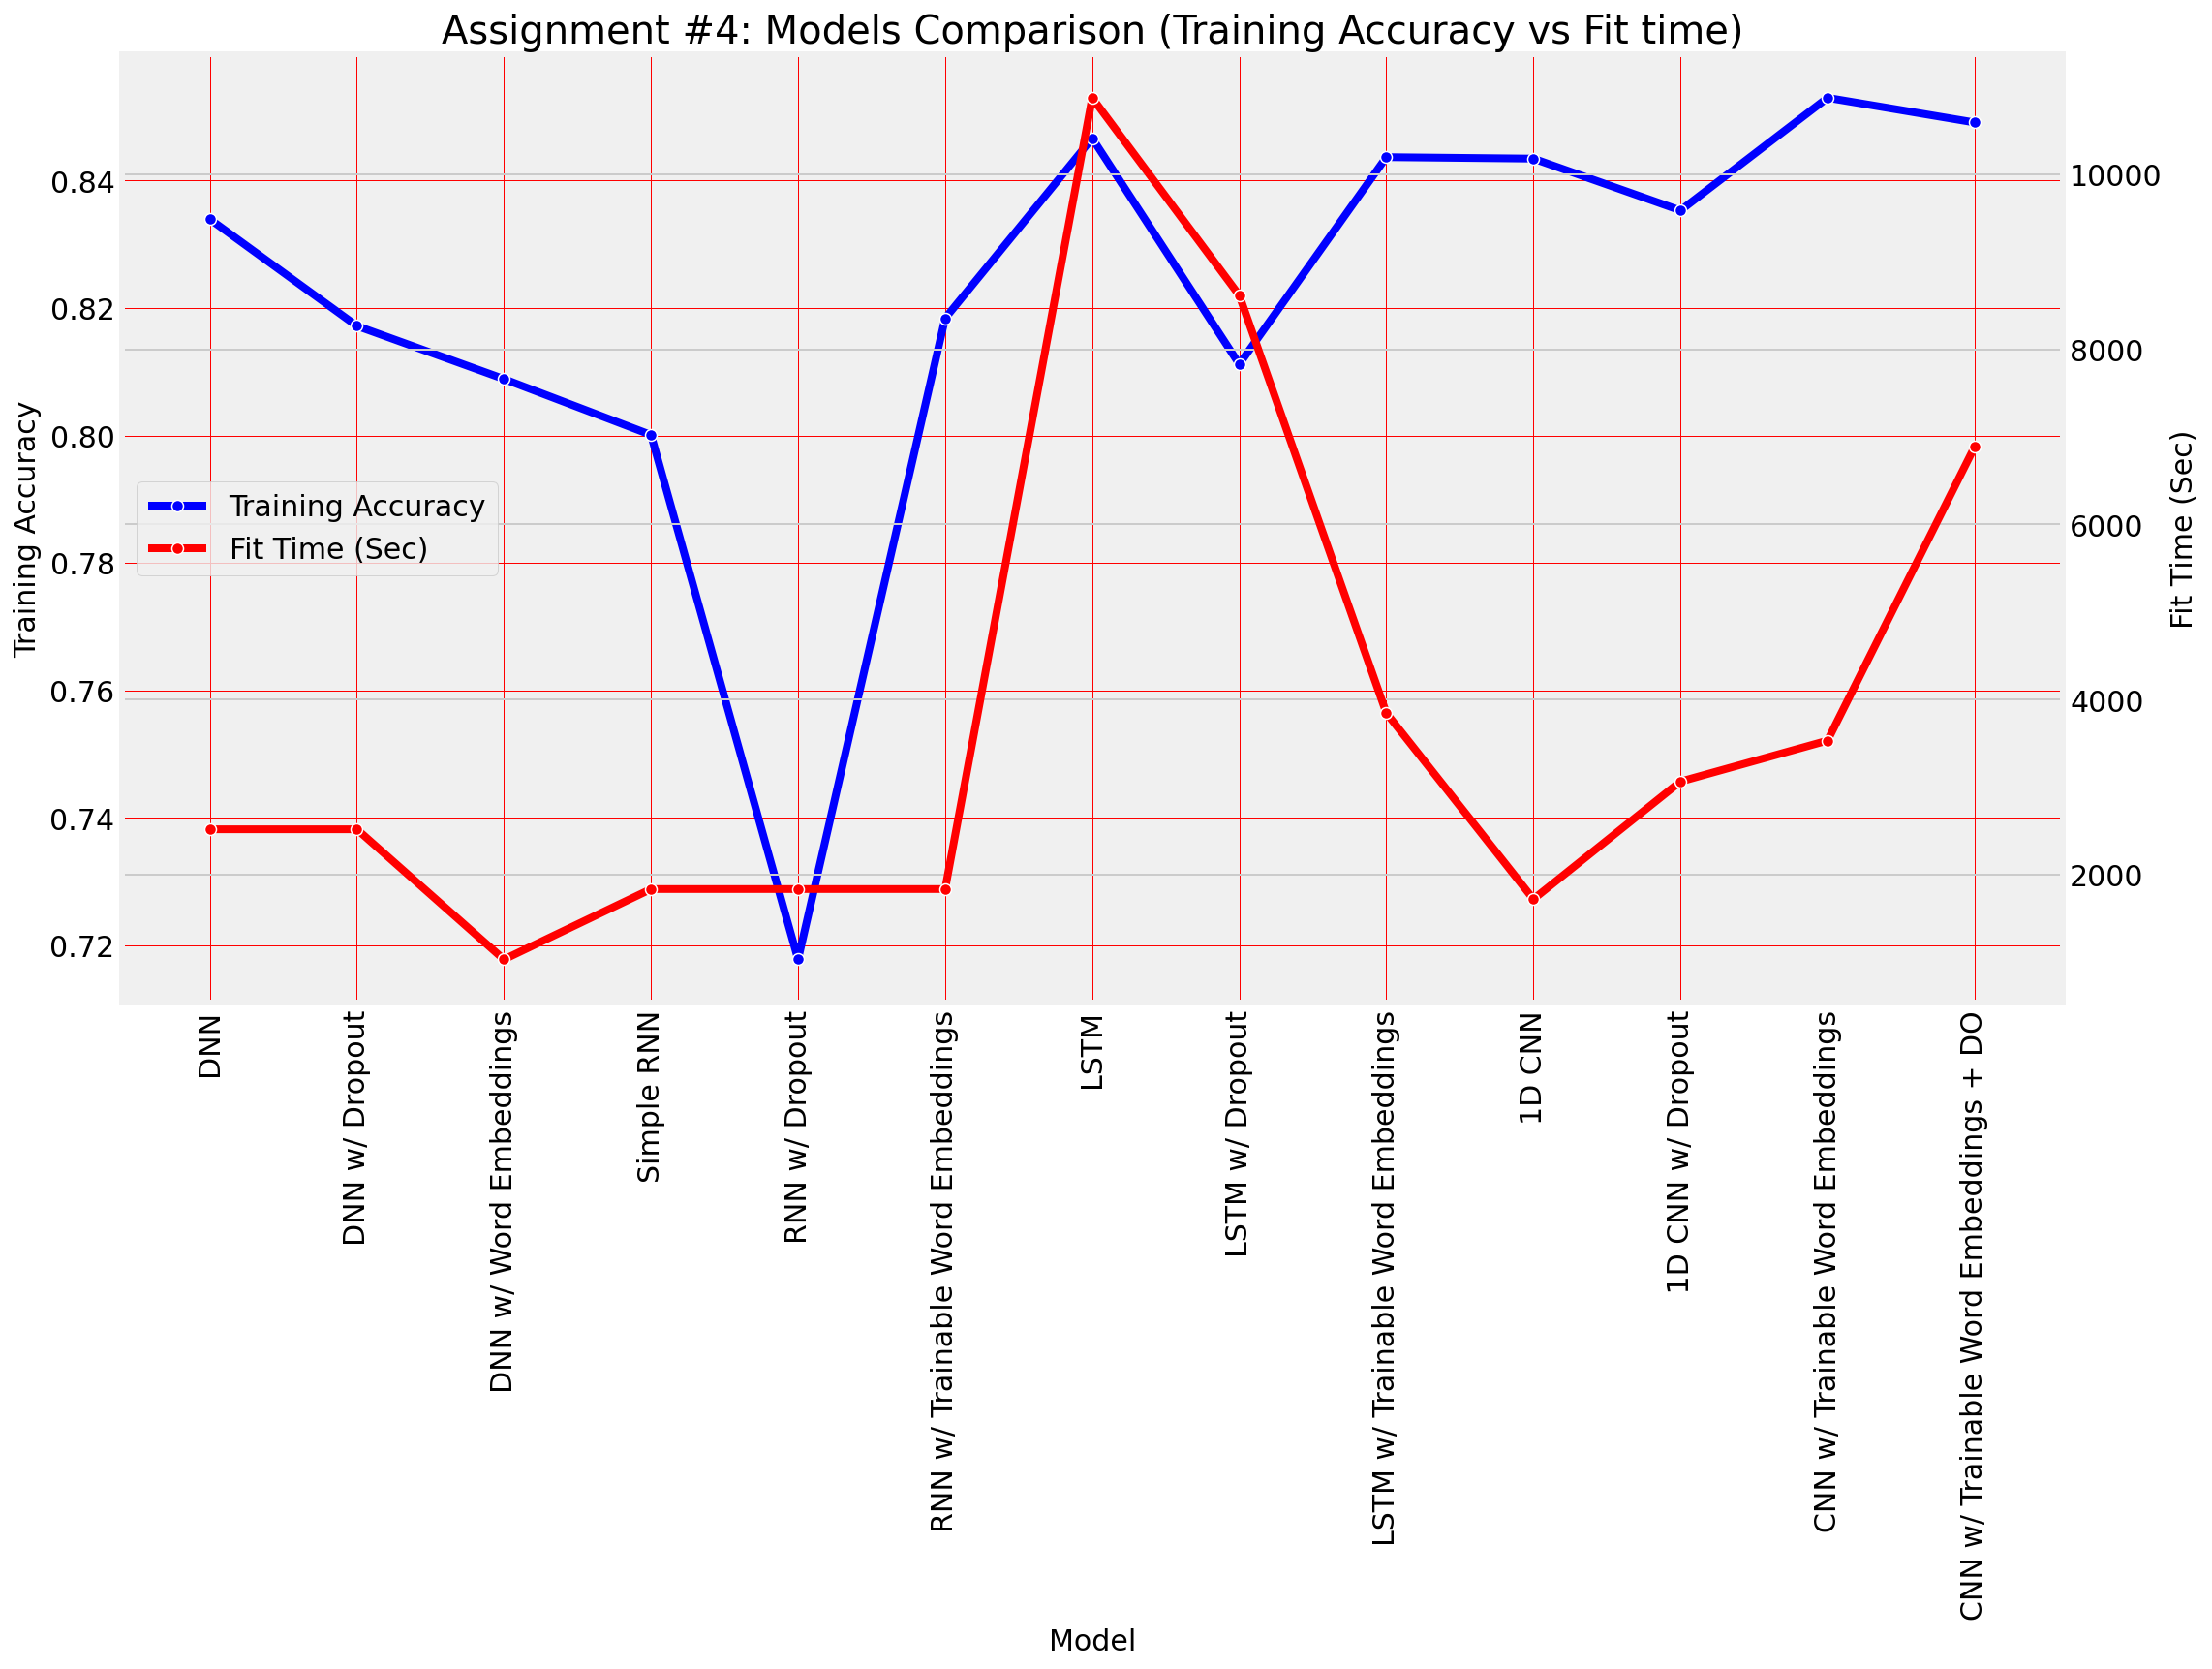

In [0]:
fig, ax = plt.subplots(figsize=(16,9))
ax2 = ax.twinx()
sns.lineplot(x="model", y="train_accuracy", data=results_df, ax=ax, color='b', marker='o', sort=False)
sns.lineplot(x="model", y="training time (sec)", data=results_df, ax=ax2, color='r',marker='o', sort=False)

ax2.legend(handles=[a.lines[0] for a in [ax,ax2]], 
           labels=["Training Accuracy", "Fit Time (Sec)"], loc='center left', fontsize=15)

ax.grid(linestyle='-', linewidth='0.5', color='red')

plt.setp(ax.get_xticklabels(), rotation=90, fontsize=15)
plt.setp(ax.get_yticklabels(),  fontsize=15)
plt.setp(ax2.get_yticklabels(),  fontsize=15)

ax.set_xlabel("Model",fontsize=15)
ax.set_ylabel("Training Accuracy",fontsize=15)
ax2.set_ylabel("Fit Time (Sec)",fontsize=15)

plt.title("Assignment #4: Models Comparison (Training Accuracy vs Fit time)", fontsize = 20)

plt.show()

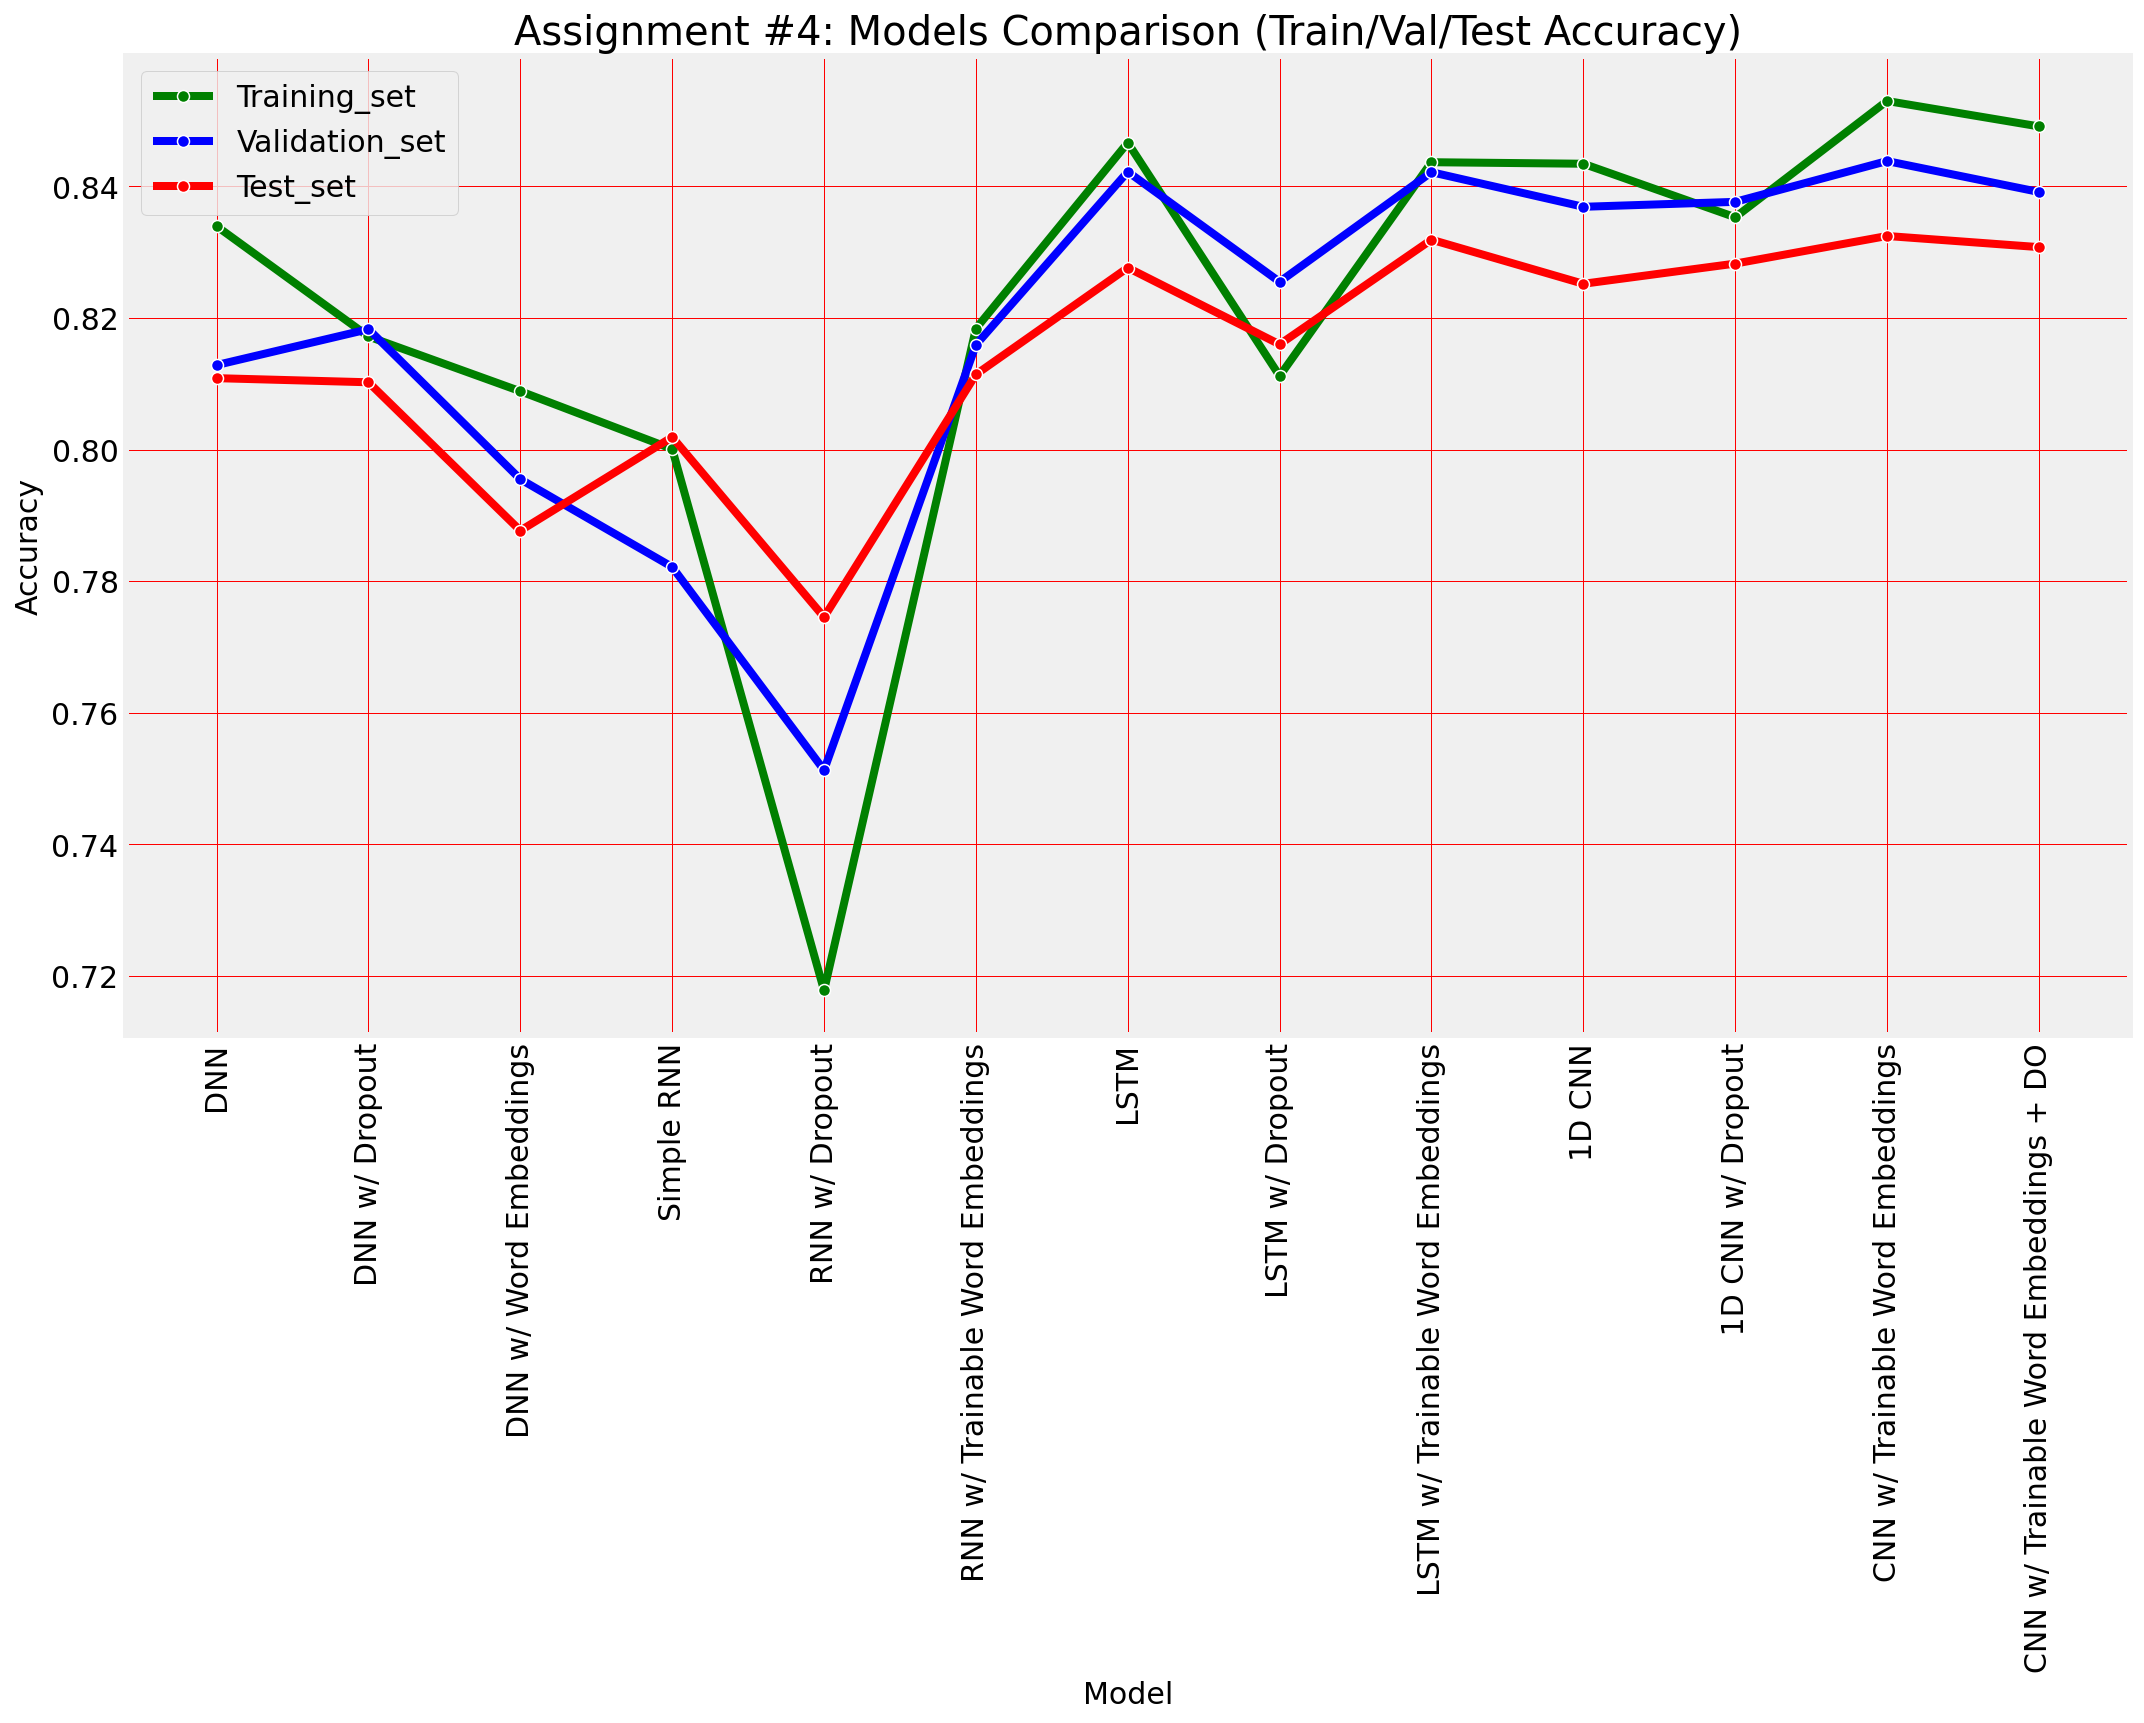

In [0]:
fig, ax = plt.subplots(figsize=(16,9))
sns.lineplot(x="model", y="train_accuracy",  data=results_df, ax=ax, color='g', marker='o', sort=False)
sns.lineplot(x="model", y="val_accuracy",  data=results_df, ax=ax, color='b',marker='o', sort=False)
sns.lineplot(x="model", y="test_accuracy",  data=results_df, ax=ax, color='r',marker='o', sort=False)

ax.legend( labels=["Training_set", "Validation_set", "Test_set"], loc='best', fontsize=15)

ax.grid(linestyle='-', linewidth='0.5', color='red')

plt.setp(ax.get_xticklabels(), rotation=90, fontsize=15)
plt.setp(ax.get_yticklabels(),  fontsize=15)

ax.set_xlabel("Model",fontsize=15)
ax.set_ylabel("Accuracy",fontsize=15)

plt.title("Assignment #4: Models Comparison (Train/Val/Test Accuracy)", fontsize = 20)

plt.show()

## AUC-ROC Curve on Best Models

Plotting AUC-ROC curve on the best-performing models from each neural network category:
* CNN w/ Trainable Word Embeddings
* LSTM w/ Trainable Word Embeddings
* RNN w/ Trainable Word Embeddings
* DNN w/ no Dropout or Pre-Trained Word Embeddings

In [42]:
# load models
model_lstm3 = load_model('model_lstm3.h5')
model_cnn4 = load_model('model_cnn4.h5')
model_rnn3 = load_model('model_rnn3.h5')
model_dnn1 = load_model('model_dnn1.h5')

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


In [0]:
yhat_lstm3 = model_lstm3.predict(x_test_seq)

In [0]:
yhat_cnn4 = model_cnn4.predict(x_test_seq)

In [0]:
yhat_rnn3 = model_rnn3.predict(x_test_seq)

In [0]:
yhat_dnn1 = model_dnn1.predict(x_test_tfidf)

In [0]:
from sklearn.metrics import roc_curve, auc

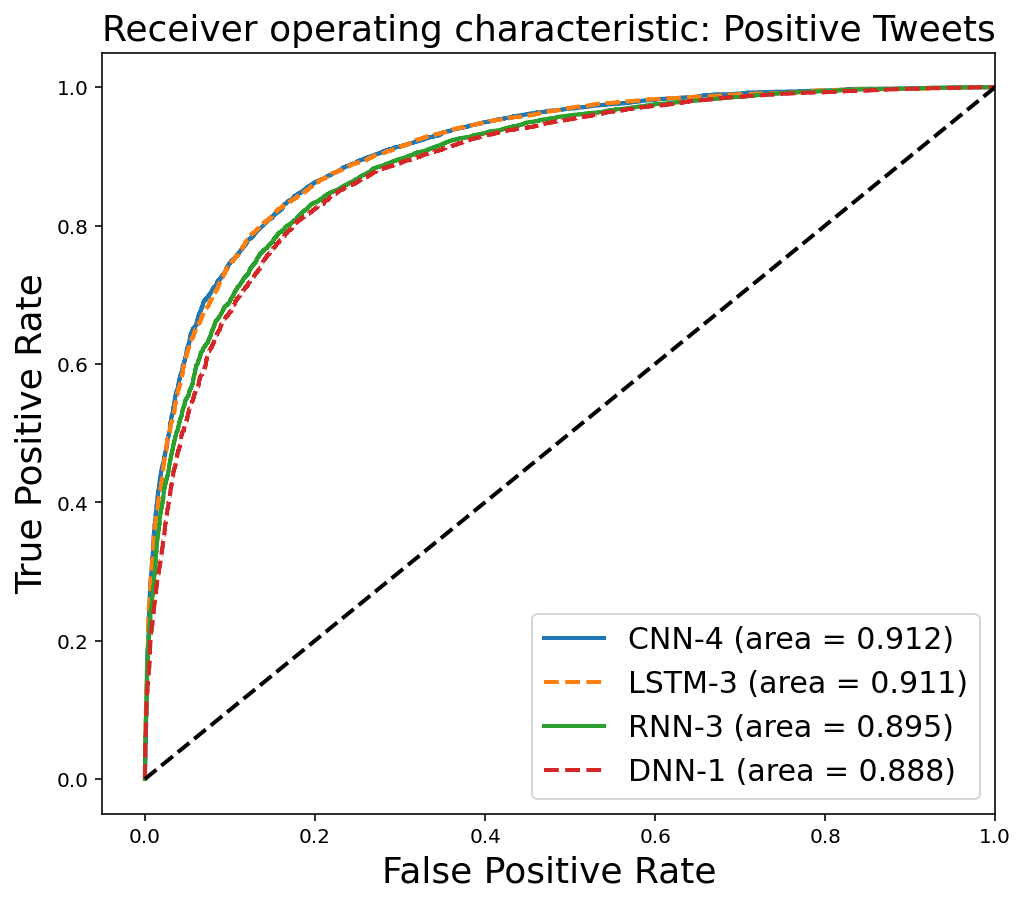

In [50]:
fpr_lstm, tpr_lstm, threshold = roc_curve(y_test, yhat_lstm3)
roc_auc_lstm = auc(fpr_lstm, tpr_lstm)

fpr_cnn, tpr_cnn, threshold = roc_curve(y_test, yhat_cnn4)
roc_auc_cnn = auc(fpr_cnn, tpr_cnn)

fpr_rnn, tpr_rnn, threshold = roc_curve(y_test, yhat_rnn3)
roc_auc_rnn = auc(fpr_rnn, tpr_rnn)

fpr_dnn, tpr_dnn, threshold = roc_curve(y_test, yhat_dnn1)
roc_auc_dnn = auc(fpr_dnn, tpr_dnn)

plt.figure(figsize=(8,7))
plt.plot(fpr_cnn, tpr_cnn, label='CNN-4 (area = %0.3f)' % roc_auc_cnn, linewidth=2)
plt.plot(fpr_lstm, tpr_lstm, label='LSTM-3 (area = %0.3f)' % roc_auc_lstm, linewidth=2, linestyle = '--')
plt.plot(fpr_rnn, tpr_rnn, label='RNN-3 (area = %0.3f)' % roc_auc_rnn, linewidth=2)
plt.plot(fpr_dnn, tpr_dnn, label='DNN-1 (area = %0.3f)' % roc_auc_dnn, linewidth=2, linestyle = '--')

plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic: Positive Tweets', fontsize=18)
plt.legend(loc="lower right", fontsize=15)
plt.show()
# plt.savefig('auc-roc_LSTMvsCNN.png')

In [0]:
0